# Customer Churn Prediction for FitLife Gym

## CRISP-DM

The **Cross-Industry Standard Process for Data Mining** (CRISP-DM) is a widely-adopted framework that provides a systematic approach to developing data mining and machine learning projects. It divides the workflow into six iterative phases:

1. **Business Understanding**: Define the project goals and understand the business context to align the analysis with stakeholder needs.
2. **Data Understanding**: Explore and analyze the dataset to identify key features, relationships, and potential challenges such as missing values or data imbalances.
3. **Data Preparation**: Clean, transform, and preprocess the data to ensure it is ready for modeling, addressing issues like missing values, encoding, scaling, and data splits.
4. **Modeling**: Select and train appropriate algorithms to develop predictive models, optimizing performance through hyperparameter tuning and cross-validation.
5. **Evaluation**: Assess the model’s effectiveness using relevant metrics and ensure it meets the business objectives.
6. **Deployment**: Integrate the final model into production, enabling practical applications and ensuring continuous performance monitoring.

**CRISP-DM** is iterative, emphasizing refinement and adaptability, making it an effective framework for applying artificial intelligence/ machine learning techniques.


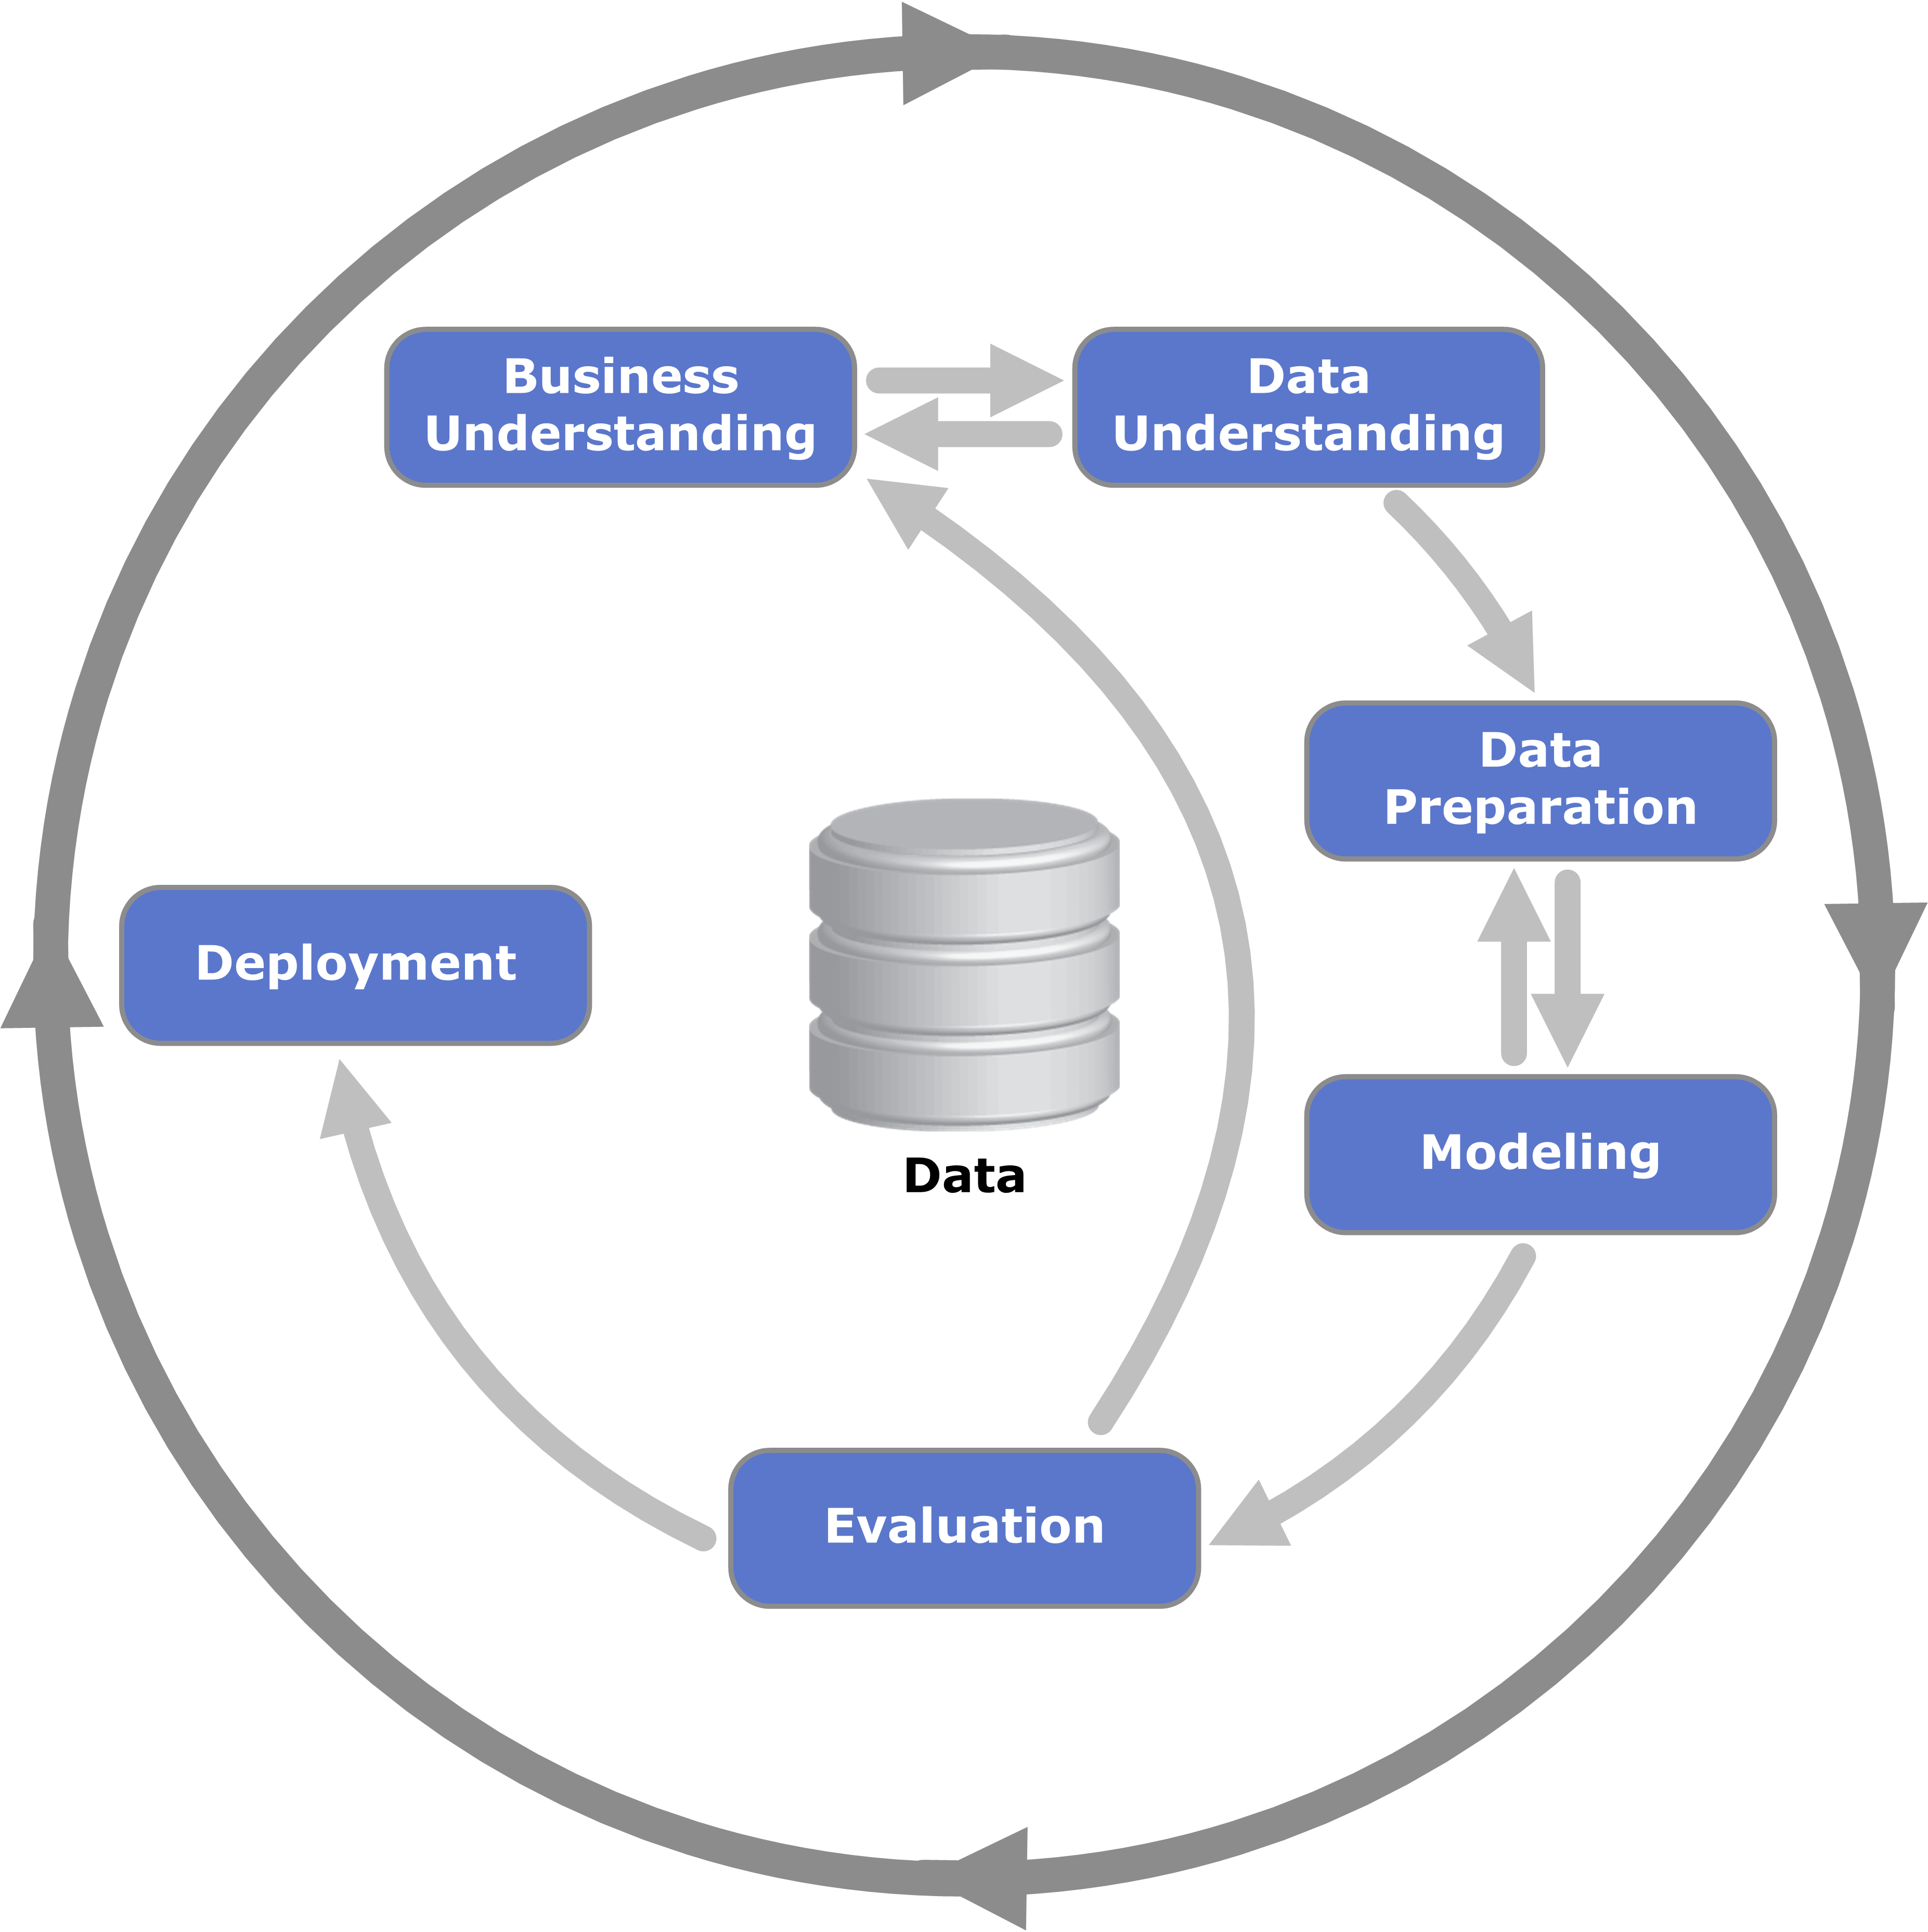

In [1]:
from IPython import display
display.Image('https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png', width=500)

## 1. Business Understanding

### 1.1 Business Context

**FitLife Gym** is a growing chain of fitness centers that prides itself on offering personalized fitness experiences to its members. The gym operates across multiple urban and suburban locations. It caters to a diverse customer base, including working professionals, students, and fitness enthusiasts. **FitLife Gym** provides a variety of services, including group classes, personal training sessions, wellness programs, and premium facilities such as saunas and swimming pools. Membership options are flexible, allowing customers to choose between monthly, quarterly, and annual contracts.


**Stakeholders**:
- **Marketing Team**: Needs to identify high-risk customers for personalized retention campaigns.
- **Senior Management**: Interested in improving profitability and customer satisfaction.


### 1.2 Problem Statement

With the rise of competition from boutique fitness studios and online workout platforms, FitLife Gym is under pressure to maintain its customer base and deliver a personalized experience. The gym’s management has recently noticed an alarming trend: a significant number of members are canceling their memberships within the first year. This phenomenon, known as customer churn, poses a serious threat to the gym’s profitability. Retaining customers is not only more cost-effective than acquiring new ones but also contributes substantially to long-term revenue growth. Research shows that **acquiring a new customer is significantly more expensive** than retaining an existing one—between **five to 25 times more costly**. On the other hand, research also highlights that increasing customer retention rates by just 5% can boost profits by 25% to 95%. This underscores the importance of keeping existing members engaged and satisfied.

Source: https://hbr.org/2014/10/the-value-of-keeping-the-right-customers

However, the business lacks a systematic approach to identifying customers who are at risk of leaving. Currently, they rely on reactive measures, addressing churn only after customers have already decided to cancel their policies. This reactive approach is inefficient and fails to prevent revenue loss.

To address this challenge, the management team has decided to leverage data-driven strategies. By analyzing historical membership data, they aim to identify patterns and predict which members are at risk of churning. This predictive capability will enable the team to design targeted interventions, such as personalized offers, loyalty rewards, or enhanced engagement programs, to retain at-risk members.




### 1.3 Research Question

**Primary Research Question**:

Understanding why members leave and predicting churn early can help **FitLife Gym** proactively address member concerns. For example:

	•	Members with low gym attendance may need motivation through personalized fitness plans.
	•	Those nearing the end of their contracts could be offered renewal discounts or incentives.
	•	Members with high additional charges might benefit from transparent communication about pricing.

The goal of this project is to answer the following question:

**Can we predict whether a gym member will churn based on their demographic details, membership type, usage patterns, and engagement metrics?**

    
The purpose of these predictions is to help **FitLife Gym**:

1. *Reduce the churn rate by identifying at-risk members early.*
2. *Increase customer lifetime value by improving retention strategies.*
3. *Enhance member satisfaction through personalized engagement.*

## 2. Data Understanding

### 2.1 Library import

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
%matplotlib inline
warnings.filterwarnings('ignore') # Removes warnings

### 2.2 Read Data

In [3]:
# Let's begin by loading the dataset to understand its structure, including column names, data types, and summary statistics.

In [4]:
# Local: Load the dataset
df = pd.read_csv('../gym_churn_us.csv')

# Or directly from Kaggle:
# df = pd.read_csv('/kaggle/input/gym-customers-features-and-churn/gym_churn_us.csv')

### 2.3 Exploratory Data Analysis

#### Dataset Column Descriptions

The dataset `gym_churn_us.csv` contains information about gym members, their demographics, membership details, and gym usage patterns. The target variable is `Churn`, which indicates whether a member has canceled their membership (1) or remains active (0). Below is a description of each column in the dataset:

| **Column Name**                     | **Description**                                                                                       | **Data Type** |
|-------------------------------------|-------------------------------------------------------------------------------------------------------|---------------|
| `gender`                            | Gender of the member (1 = Male, 0 = Female).                                                          | Categorical   |
| `Near_Location`                     | Whether the member lives near the gym (1 = Yes, 0 = No).                                              | Categorical   |
| `Partner`                           | Whether the member is an employee of a partner company (1 = Yes, 0 = No).                             | Categorical   |
| `Promo_friends`                     | Whether the member joined through a promotion with friends (1 = Yes, 0 = No).                         | Categorical   |
| `Phone`                             | Whether the member provided their phone number (1 = Yes, 0 = No).                                     | Categorical   |
| `Contract_period`                   | Length of the membership contract in months (e.g., 1, 6, or 12 months).                               | Numerical     |
| `Group_visits`                      | Whether the member attended group classes (1 = Yes, 0 = No).                                          | Categorical   |
| `Age`                               | Age of the member in years.                                                                           | Numerical     |
| `Avg_additional_charges_total`      | Average total additional charges incurred by the member (e.g., for personal training or merchandise). | Numerical     |
| `Month_to_end_contract`             | Number of months remaining until the membership contract ends.                                        | Numerical     |
| `Lifetime`                          | Total number of months the member has been with the gym.                                              | Numerical     |
| `Avg_class_frequency_total`         | Member's average frequency of attending gym classes per week over their lifetime.                     | Numerical     |
| `Avg_class_frequency_current_month` | Member's average frequency of attending gym classes per week in the current month.                    | Numerical     |
| `Churn`                             | Target variable indicating whether the member has churned (1 = Yes, 0 = No).                          | Categorical   |


#### Load and Inspect the Dataset

In [5]:
#Check the number of rows and columns
df.shape

(4000, 14)

In [6]:
# List index
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [7]:
#Display first few rows for inspection
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [8]:
# Display basic information about the dataset (structure, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

#### Summarize Statistical Properties

In [9]:
# Display summary statistics about the dataset
df.describe(include='all')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Explore the Target Variable

In [10]:
# Count values for dependent variable y (Churn)
df['Churn'].value_counts()

Churn
0    2939
1    1061
Name: count, dtype: int64

#### Check for Missing Values

In [11]:
# Check missing data
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

#### Check for Duplicates

In [12]:
# Check for duplicate rows SPÄTER?
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


#### Check outliers

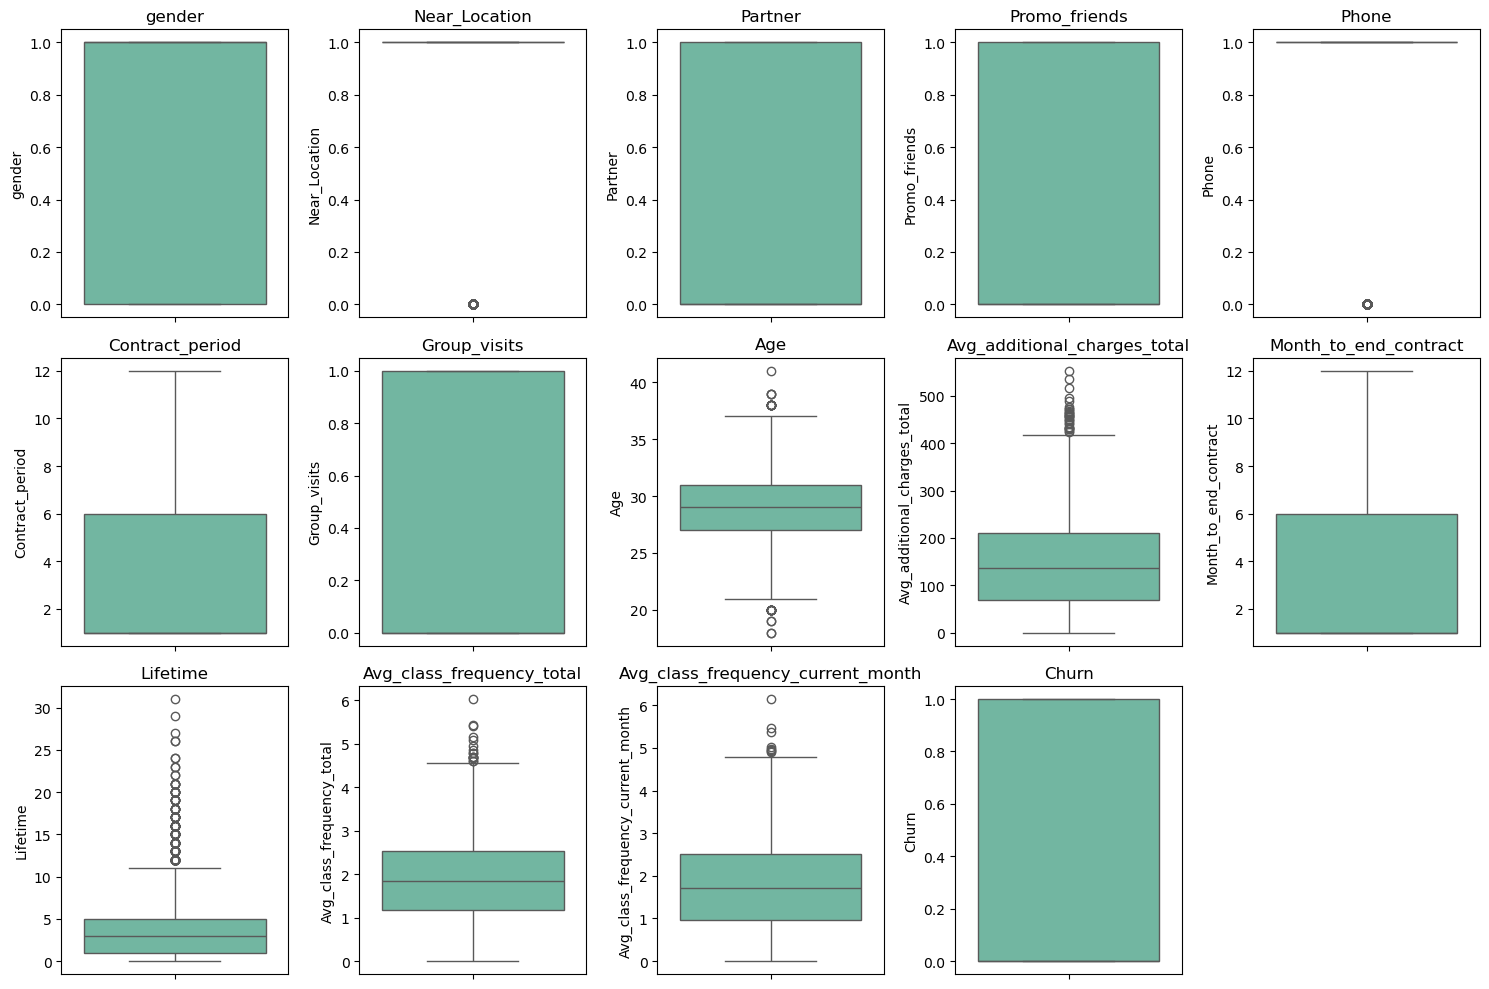

In [13]:
# Detecting outliers using boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[column], palette="Set2")
    plt.title(column)
plt.tight_layout()
plt.show()

In [14]:
# Set up the plotting style
sns.set(style="whitegrid")

#### Identify Data Imbalance

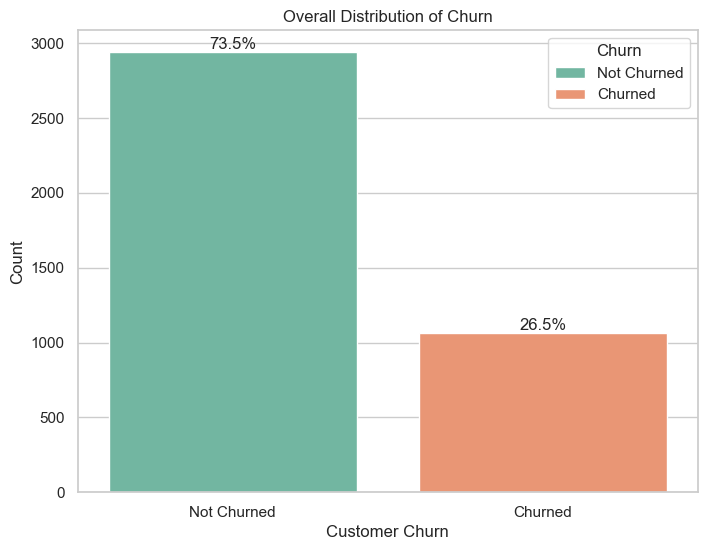

In [15]:
# Plot distribution of Churn with percentages
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Churn", palette="Set2")

# Calculate the percentage of churned and not churned customers
churn_counts = df['Churn'].value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100

# Adding percentage annotations above the bars
for i, count in enumerate(churn_counts):
    percentage = churn_percentages[i]
    plt.text(x=i,  # Position on the x-axis
             y=count + 5,  # Position slightly above the bar
             s=f'{percentage:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=12)

# Set labels and title
plt.title("Overall Distribution of Churn")
plt.xlabel("Customer Churn")
plt.ylabel("Count")

# Adding legend
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

plt.xticks(ticks=[0, 1], labels=["Not Churned", "Churned"])
plt.show()


### Gender by Churn

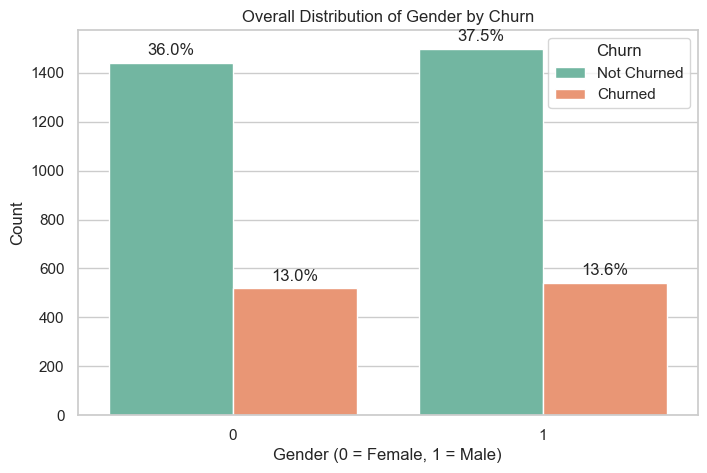

In [16]:
# Distribution of Gender by Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
plt.title('Overall Distribution of Gender by Churn')
plt.ylabel('Count')
plt.xlabel('Gender (0 = Female, 1 = Male)')

# Calculate percentage distribution based on the overall count
gender_counts = df.groupby(['gender', 'Churn']).size().unstack(fill_value=0)
gender_counts_percentage = gender_counts.div(gender_counts.sum().sum(), axis=0) * 100  # Using total count for overall percentage

# Adding percentage annotations
for i in range(len(gender_counts.index)):
    total = gender_counts.values[i].sum()
    for j in range(len(gender_counts.columns)):
        percentage = gender_counts_percentage.values[i, j]
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position for each bar
                 y=gender_counts.values[i, j] + 20,  # Add offset to y-position for clarity
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


### Age

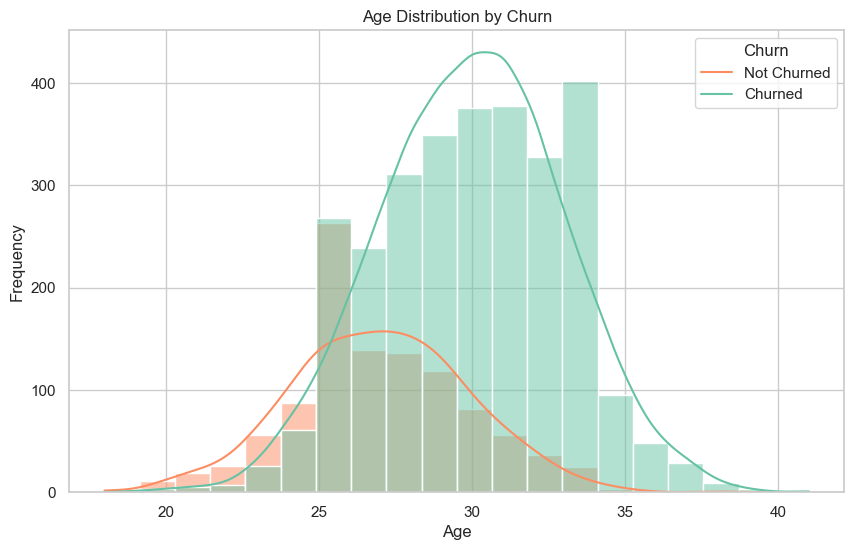

In [17]:
# Plot distribution of Age with respect to Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Churn", kde=True, bins=20, palette="Set2")
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Churn", labels=['Not Churned', 'Churned'])
plt.show()

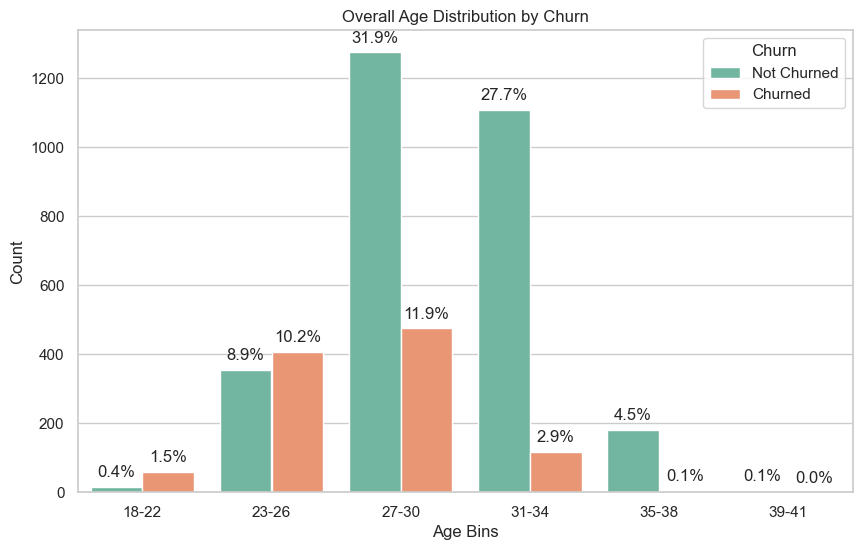

In [18]:
# Create age bins
bins = [18, 22, 26, 30, 34, 38, 41]  # Adjust based on the range 18-41
bin_labels = ['18-22', '23-26', '27-30', '31-34', '35-38', '39-41']

# Add a new column to classify age into bins
df['Age_bin'] = pd.cut(df['Age'], bins=bins, labels=bin_labels, right=True, include_lowest=True)

# Distribution of Age Bins by Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_bin', hue='Churn', data=df, palette='Set2')
plt.title('Overall Age Distribution by Churn')
plt.ylabel('Count')
plt.xlabel('Age Bins')

# Calculate overall percentage distribution (based on the total count, not within each bin)
age_bin_counts = df.groupby(['Age_bin', 'Churn']).size().unstack(fill_value=0)
total_count = len(df)  # Total number of rows in the dataset
age_bin_counts_percentage = age_bin_counts.div(total_count, axis=0) * 100

# Adding percentage annotations
for i in range(len(age_bin_counts.index)):
    total = age_bin_counts.values[i].sum()  # Total count for the current age bin
    for j in range(len(age_bin_counts.columns)):
        count_value = age_bin_counts.values[i, j]
        percentage = age_bin_counts_percentage.values[i, j]
        # Adjust x-position for each bar to avoid overlapping
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 20,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


### Contract Period by Churn

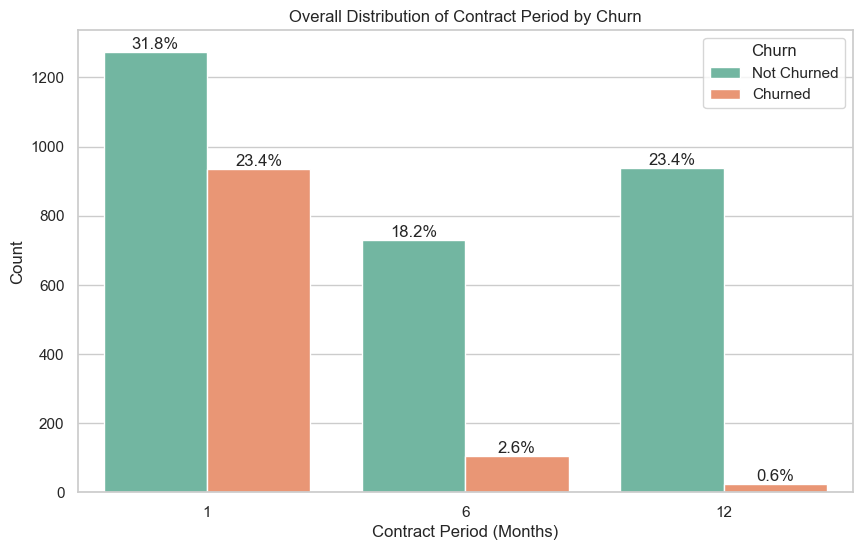

In [19]:
# Plot distribution of Contract Period by Churn with percentages above the bars
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Contract_period", hue="Churn", palette="Set2")
plt.title("Overall Distribution of Contract Period by Churn")
plt.xlabel("Contract Period (Months)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Calculate the overall distribution of counts (for percentages relative to the entire dataset)
contract_period_counts = df.groupby(['Contract_period', 'Churn']).size().unstack(fill_value=0)
contract_period_counts_total = contract_period_counts.sum().sum()  # Total number of entries

# Calculate percentage distribution relative to the overall count
contract_period_counts_percentage = contract_period_counts.div(contract_period_counts_total, axis=None) * 100

# Adding percentage annotations above the bars
for i in range(len(contract_period_counts.index)):
    for j in range(len(contract_period_counts.columns)):
        count_value = contract_period_counts.values[i, j]
        percentage = contract_period_counts_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()


### Lifetime by Churn

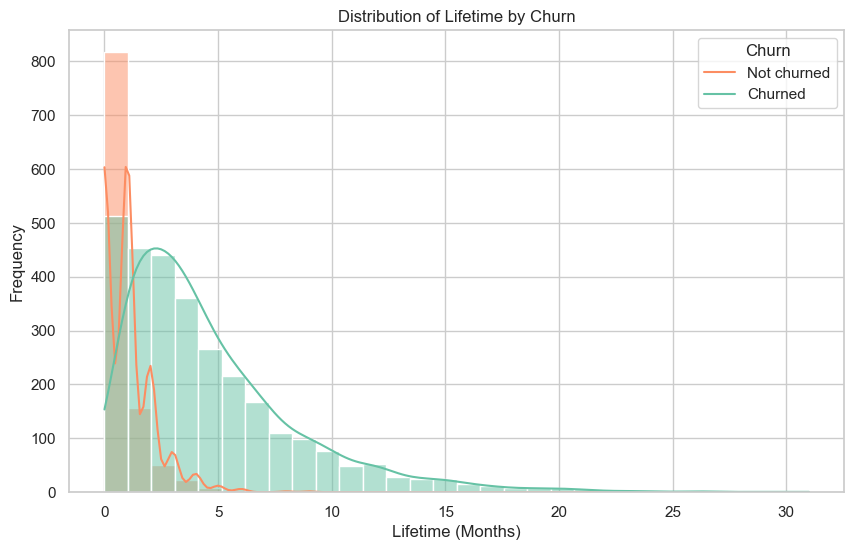

In [20]:
# Plot distribution of Lifetime by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Lifetime", hue="Churn", kde=True, bins=30, palette="Set2")
plt.title("Distribution of Lifetime by Churn")
plt.xlabel("Lifetime (Months)")
plt.ylabel("Frequency")
plt.legend(title="Churn", labels=["Not churned", "Churned"])
plt.show()


### Months to End Contract by Churn

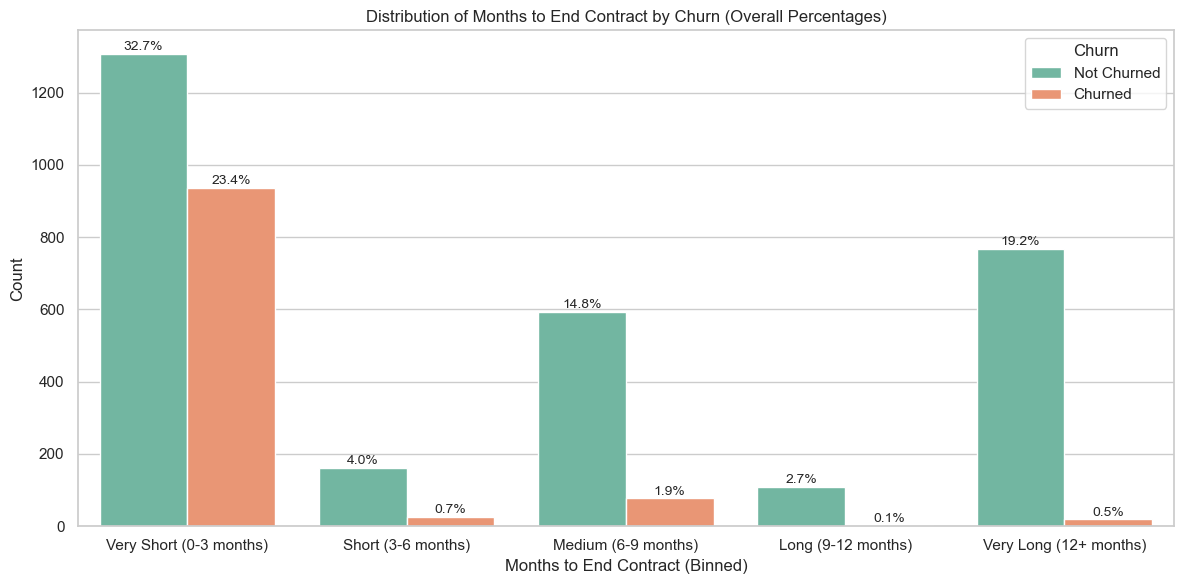

In [21]:
# Bin 'Month_to_end_contract' into categories
df['Month_to_end_contract_bins'] = pd.cut(
    df['Month_to_end_contract'],
    bins=5,
    labels=[
        'Very Short (0-3 months)',
        'Short (3-6 months)',
        'Medium (6-9 months)',
        'Long (9-12 months)',
        'Very Long (12+ months)'
    ]
)

# Plot distribution with percentage annotations (overall percentages)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Month_to_end_contract_bins", hue="Churn", palette="Set2")
plt.title("Distribution of Months to End Contract by Churn (Overall Percentages)")
plt.xlabel("Months to End Contract (Binned)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Total number of observations
total_count = len(df)

# Group counts and calculate overall percentages
contract_end_counts = df.groupby(['Month_to_end_contract_bins', 'Churn']).size().unstack(fill_value=0)
contract_end_percentage_overall = contract_end_counts / total_count * 100

# Add percentage annotations to the bars (based on overall count)
for i, bin_category in enumerate(contract_end_counts.index):
    for j, churn_category in enumerate(contract_end_counts.columns):
        count_value = contract_end_counts.values[i, j]
        percentage_overall = contract_end_percentage_overall.values[i, j]
        # Annotate percentage on the plot
        plt.text(
            x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
            y=count_value + 2,    # Offset slightly above the bar
            s=f'{percentage_overall:.1f}%',  # Overall percentage format
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Contract Period by Churn

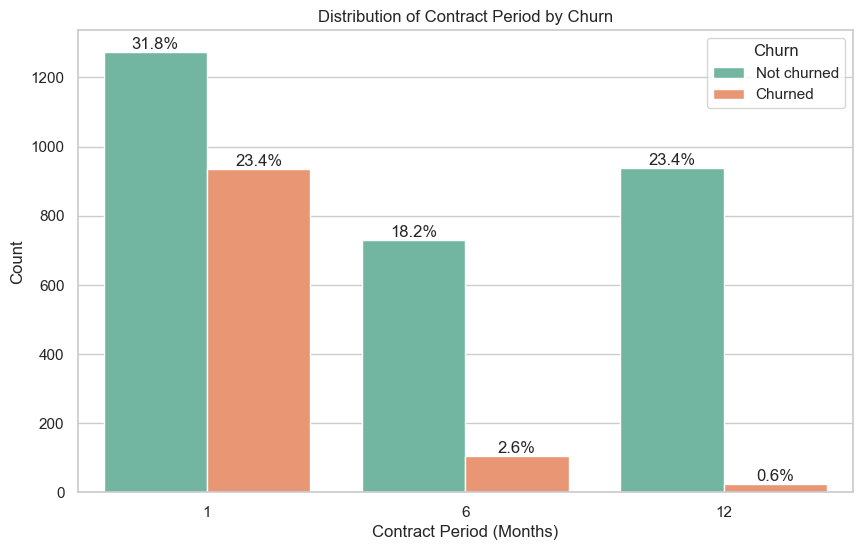

In [22]:
# Plot distribution of Contract Period by Churn with percentages above the bars
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Contract_period", hue="Churn", palette="Set2")
plt.title("Distribution of Contract Period by Churn")
plt.xlabel("Contract Period (Months)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not churned", "Churned"])

# Calculate percentage distribution relative to the overall count (entire dataset)
contract_period_counts = df.groupby(['Contract_period', 'Churn']).size().unstack(fill_value=0)
contract_period_counts_total = contract_period_counts.sum().sum()  # Total count of all records in the dataset
contract_period_counts_percentage = contract_period_counts.div(contract_period_counts_total, axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(contract_period_counts.index)):
    for j in range(len(contract_period_counts.columns)):
        count_value = contract_period_counts.values[i, j]
        percentage = contract_period_counts_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()


### Additional Charges by Churn

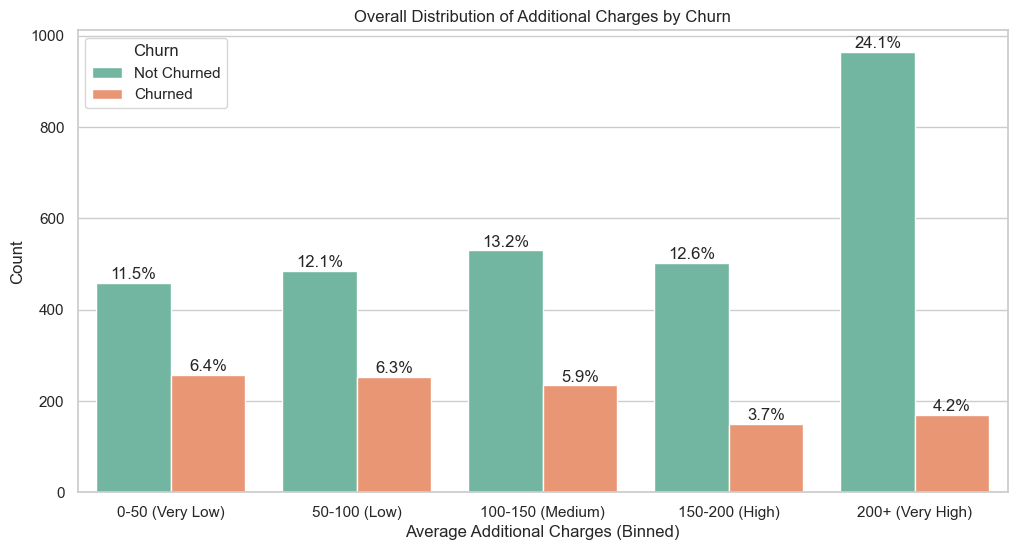

In [23]:
# Bin Avg_additional_charges_total into 5 intervals and add meaningful labels
df['Additional_charges_bins'] = pd.cut(
    df['Avg_additional_charges_total'],
    bins=[0, 50, 100, 150, 200, df['Avg_additional_charges_total'].max()], 
    labels=['0-50 (Very Low)', '50-100 (Low)', '100-150 (Medium)', '150-200 (High)', '200+ (Very High)'],
    include_lowest=True
)

# Plot distribution of Avg_additional_charges_total by Churn with percentages
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Additional_charges_bins", hue="Churn", palette="Set2")
plt.title("Overall Distribution of Additional Charges by Churn")
plt.xlabel("Average Additional Charges (Binned)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Calculate percentage distribution relative to the overall count (not by bin)
total_counts = df['Churn'].count()  # Total number of customers
additional_charges_counts = df.groupby(['Additional_charges_bins', 'Churn']).size().unstack(fill_value=0)
additional_charges_percentage = additional_charges_counts.div(total_counts, axis=0) * 100  # Relative to overall count

# Adding percentage annotations above the bars
for i in range(len(additional_charges_counts.index)):
    for j in range(len(additional_charges_counts.columns)):
        count_value = additional_charges_counts.values[i, j]
        percentage = additional_charges_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()


### Average Class Frequency by Churn

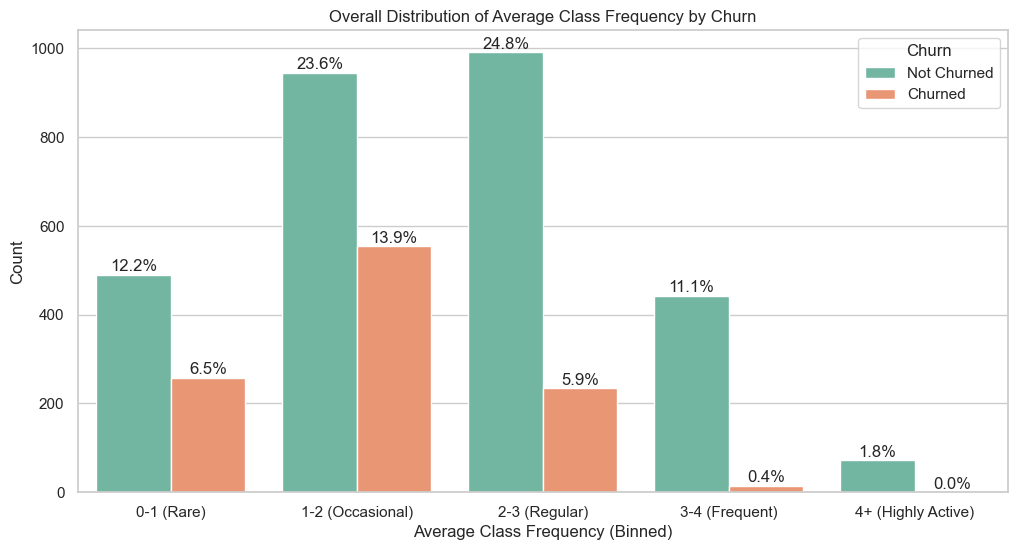

In [24]:
# Bin Avg_class_frequency_total into 5 intervals and add meaningful labels
df['Class_frequency_bins'] = pd.cut(
    df['Avg_class_frequency_total'],
    bins=[0, 1, 2, 3, 4, df['Avg_class_frequency_total'].max()], 
    labels=['0-1 (Rare)', '1-2 (Occasional)', '2-3 (Regular)', '3-4 (Frequent)', '4+ (Highly Active)'],
    include_lowest=True
)

# Plot distribution of Avg_class_frequency_total by Churn with percentages
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Class_frequency_bins", hue="Churn", palette="Set2")
plt.title("Overall Distribution of Average Class Frequency by Churn")
plt.xlabel("Average Class Frequency (Binned)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Calculate the percentage distribution in relation to the overall count (not per bin)
total_counts = df['Churn'].value_counts()  # Overall counts of churned and not churned customers
total_count = len(df)  # Total number of customers

# Grouping by 'Class_frequency_bins' and 'Churn'
class_frequency_counts = df.groupby(['Class_frequency_bins', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages relative to the overall count
class_frequency_percentage = class_frequency_counts.div(total_count, axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(class_frequency_counts.index)):
    for j in range(len(class_frequency_counts.columns)):
        count_value = class_frequency_counts.values[i, j]
        percentage = class_frequency_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.show()


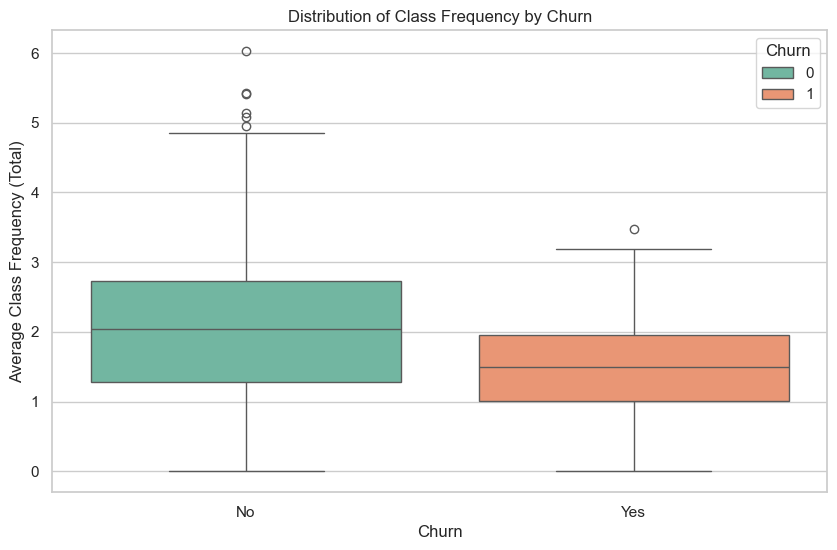

In [25]:
# Distribution of Class Frequency by Churn
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="Churn", y="Avg_class_frequency_total",hue='Churn', palette="Set2")
plt.title("Distribution of Class Frequency by Churn")
plt.xlabel("Churn")
plt.ylabel("Average Class Frequency (Total)")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

### Group Visits by Churn

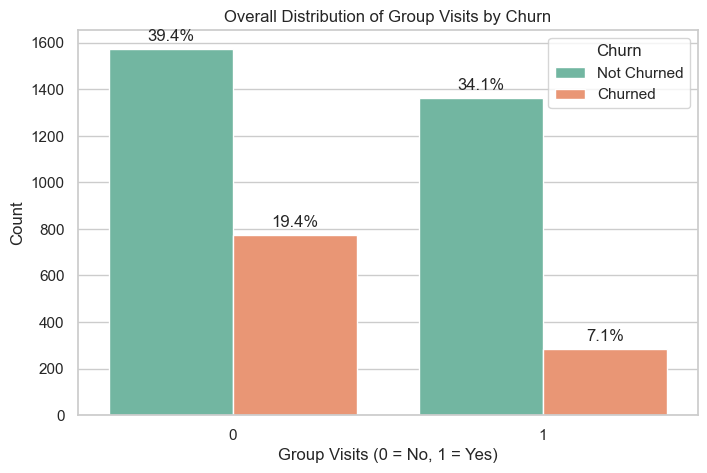

In [26]:
# Distribution of Group_visits by Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Group_visits', hue='Churn', data=df, palette='Set2')
plt.title('Overall Distribution of Group Visits by Churn')
plt.ylabel('Count')
plt.xlabel('Group Visits (0 = No, 1 = Yes)')

# Calculate overall percentage distribution
group_visits_counts = df.groupby(['Group_visits', 'Churn']).size().unstack(fill_value=0)
total_count = len(df)

# Calculate percentage in relation to the total count of the dataset
group_visits_counts_percentage = group_visits_counts.div(total_count, axis=0) * 100

# Adding percentage annotations
for i in range(len(group_visits_counts.index)):
    for j in range(len(group_visits_counts.columns)):
        count_value = group_visits_counts.values[i, j]
        percentage = group_visits_counts_percentage.values[i, j]
        # Adjust x-position for each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 20,  # Add offset to y-position for clarity
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


### Promo_friends by Churn

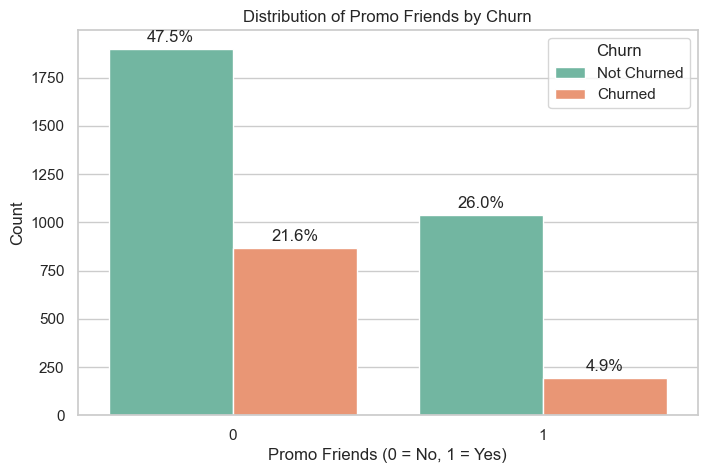

In [27]:
# Distribution of Promo_friends by Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Promo_friends', hue='Churn', data=df, palette='Set2')
plt.title('Distribution of Promo Friends by Churn')
plt.ylabel('Count')
plt.xlabel('Promo Friends (0 = No, 1 = Yes)')

# Calculate overall percentage distribution
promo_friends_counts = df.groupby(['Promo_friends', 'Churn']).size().unstack(fill_value=0)
total_count = len(df)

# Calculate percentage in relation to the total count of the dataset
promo_friends_counts_percentage = promo_friends_counts.div(total_count, axis=0) * 100

# Adding percentage annotations
for i in range(len(promo_friends_counts.index)):
    for j in range(len(promo_friends_counts.columns)):
        count_value = promo_friends_counts.values[i, j]
        percentage = promo_friends_counts_percentage.values[i, j]
        # Adjust x-position for each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 20,  # Add offset to y-position for clarity
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

### Partner by Churn

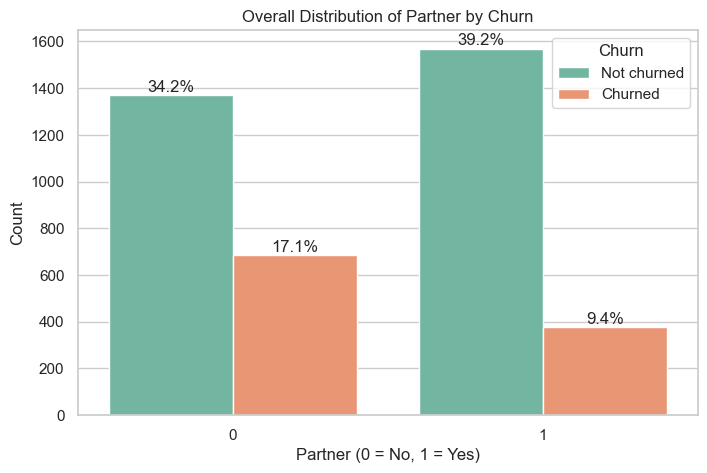

In [28]:
# Plot distribution of Partner by Churn with percentages above the bars
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Partner", hue="Churn", palette="Set2")
plt.title("Overall Distribution of Partner by Churn")
plt.xlabel("Partner (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Calculate the overall count distribution
partner_counts = df.groupby(['Partner', 'Churn']).size().unstack(fill_value=0)
total_counts = df.shape[0]  # Total number of records

# Calculate percentage distribution based on overall count
partner_counts_percentage = partner_counts.div(total_counts, axis=0) * 100

# Adding percentage annotations above the bars
for i in range(len(partner_counts.index)):
    for j in range(len(partner_counts.columns)):
        count_value = partner_counts.values[i, j]
        percentage = partner_counts_percentage.values[i, j]
        # Adjust x-position for annotation to align with each bar
        plt.text(x=i - 0.2 + j * 0.4,  # Adjust x-position based on bar width
                 y=count_value + 2,  # Offset slightly above the bar
                 s=f'{percentage:.1f}%', 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.xticks(rotation=0)
plt.legend(title="Churn", labels=["Not churned", "Churned"])
plt.show()


### Near Location by Churn

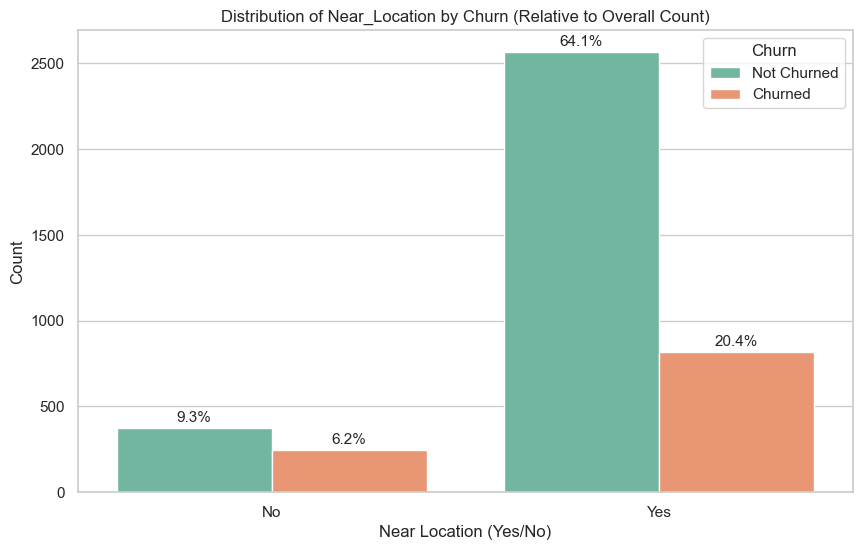

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Near_Location by Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Near_Location', hue='Churn', data=df, palette='Set2')

# Add percentage annotations in relation to the overall count
near_location_counts = df.groupby(['Near_Location', 'Churn']).size().unstack(fill_value=0)
total_counts = near_location_counts.sum(axis=1)  # Total customers per Near_Location category
percentages = near_location_counts.div(len(df)) * 100  # Calculate percentages overall

# Annotating bars
for i, (loc, counts) in enumerate(near_location_counts.iterrows()):
    for j, count in enumerate(counts):
        percentage = percentages.values[i, j]
        plt.text(
            x=i - 0.2 + j * 0.4,  # Adjust position based on bar width
            y=count + 20,  # Place annotation slightly above the bar
            s=f"{percentage:.1f}%", 
            ha='center', va='bottom', fontsize=11
        )

# Plot adjustments
plt.title('Distribution of Near_Location by Churn (Relative to Overall Count)')
plt.ylabel('Count')
plt.xlabel('Near Location (Yes/No)')
plt.xticks([0, 1], labels=['No', 'Yes'])  # Custom labels for better readability
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


# **Executive Summary of EDA Insights**

This summary presents the most significant findings from the exploratory data analysis (EDA) performed on the customer dataset for churn prediction. The insights focus on identifying patterns and behaviors that influence customer churn, with implications for retention strategies.

---

## **1. Churn Distribution**
- Overall churn rate is **26.5%**, with **73.5%** of customers remaining active.
- This highlights a moderate churn issue that requires targeted retention strategies.

---

## **2. Gender**
- Churn is equally distributed across genders:
  - Female churn rate: **13.0%**
  - Male churn rate: **13.6%**
- **Implication**: Gender does not significantly influence churn, so retention strategies should focus on other factors.

---

## **3. Age**
- The average age of customers is **29 years**, with most churn occurring in the age range of **23–30 years**:
  - Age 23–26: **10.2% churn**
  - Age 27–30: **11.9% churn**
- **Implication**: Younger members may require tailored engagement strategies to improve retention.

---

## **4. Contract Period**
- Short-term contracts (1 month) dominate with **55.2%** of members, and they account for the highest churn rate at **23.4%**.
- Long-term contracts (12 months) have significantly lower churn at **0.6%**.
- **Implication**: Encouraging longer-term contracts through incentives could reduce churn.

---

## **5. Lifetime**
- Churn is highly correlated with early membership experiences:
  - **25.1% of churn occurs within the first 0–5 months**.
  - Members who stay beyond 6 months show strong long-term retention.
- **Implication**: Improving onboarding and early engagement is critical to reducing early churn.

---

## **6. Additional Charges**
- Higher spending on additional services correlates with lower churn:
  - Low spenders (<$50): **6.4% churn**
  - High spenders ($200+): Only **4.2% churn**
- **Implication**: Encouraging additional purchases through promotions or loyalty rewards can increase member engagement and reduce churn.

---

## **7. Average Class Frequency**
- Members with higher class attendance are less likely to churn:
  - Rare attendees (0–1 classes/week): **6.5% churn**
  - Frequent attendees (3–4 classes/week): Only **0.4% churn**
- **Implication**: Declining attendance is a strong predictor of churn, so monitoring attendance and engaging low-attendance members is essential.

---


## **8. Group Visits**
- Members who attend group classes have a much lower churn rate (**7.1%**) compared to those who do not (**19.4%**).
- **Implication**: Promoting group activities can foster a sense of community and improve retention.

---

## **9. Promo Friends**
- Members who joined through promotions with friends have a significantly lower churn rate (**4.9%**) compared to those who joined alone (**21.6%**).
- **Implication**: Social connections play a critical role in retention. Referral programs and group sign-ups are effective in reducing churn.

---

## **10. Proximity to Gym**
- Members living or work near the gym have higher churn rates (**20.4%**) compared to those living farther away (**6.2%**).
- **Implication**: Living or working near the gym does not necessarily lead to consistent attendance or engagement.  The gym may have reached market saturation for nearby residents, meaning most local customers are either already members or are less interested in membership.


## **Actionable Recommendations**
1. Focus on improving early engagement during the first 5 months of membership.
2. Encourage longer-term contracts through discounts or added benefits.
3. Promote group activities and social fitness programs to foster community engagement.
4. Implement referral programs to attract members who join with friends.
5. Monitor class attendance and proactively engage members with declining participation.
6. Offer personalized promotions for additional services to increase perceived value and commitment.
7. 


#### Relationship between features

In [30]:
# Drop categorical columns to calucate correleation
# List of binned columns to drop
binned_columns = ['Age_bin', 'Month_to_end_contract_bins', 'Additional_charges_bins', 'Class_frequency_bins']

# Dropping the binned columns
df_new=df.drop(columns=binned_columns)

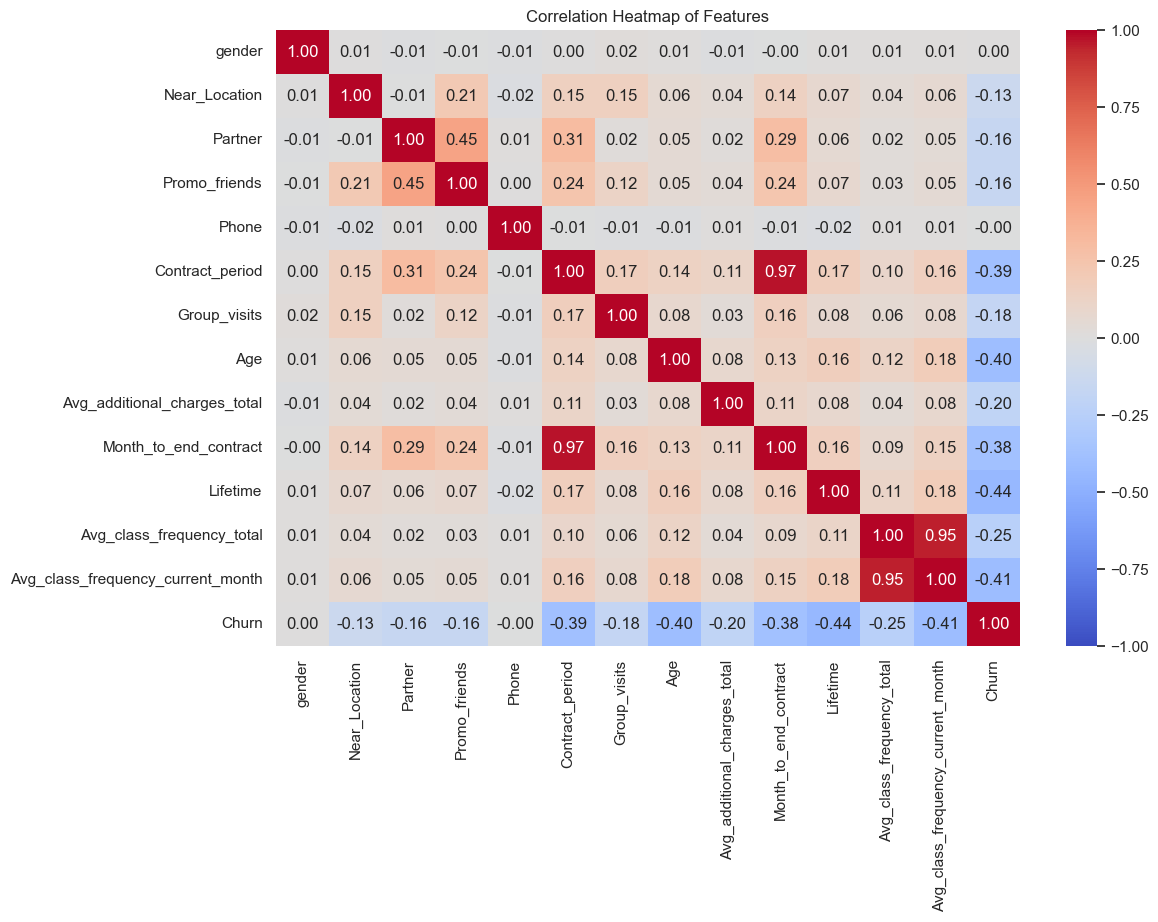

In [31]:
# Correlation heatmap for numerical features:
plt.figure(figsize=(12, 8))
correlation_matrix = df_new.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features")
plt.show()

In [32]:
correlation_matrix['Churn'].sort_values()

Lifetime                            -0.438220
Avg_class_frequency_current_month   -0.412348
Age                                 -0.404735
Contract_period                     -0.389984
Month_to_end_contract               -0.381393
Avg_class_frequency_total           -0.249715
Avg_additional_charges_total        -0.198697
Group_visits                        -0.175325
Promo_friends                       -0.162233
Partner                             -0.157986
Near_Location                       -0.128098
Phone                               -0.001177
gender                               0.000708
Churn                                1.000000
Name: Churn, dtype: float64

#### **Key Insights:**
1. **Behavioral Features:**
   - Longer gym membership (`Lifetime`, -0.438) and higher class attendance in the current month (-0.412) strongly reduce churn.
   - Members with higher overall attendance (-0.250) and spending on additional services (-0.199) are less likely to churn.

2. **Contract Features:**
   - Longer contracts (`Contract_period`, -0.390) and more remaining months (-0.381) significantly lower churn.

3. **Demographic Features:**
   - Older members (-0.405) are less likely to churn compared to younger members.
   - Social factors, such as joining through friends (-0.162) or corporate partnerships (-0.158), have a moderate impact on retention.

4. **Minimal or Insignificant Features:**
   - Features like `Phone` (-0.001) and `Gender` (0.0007) have no meaningful correlation with churn.


## 3. Data Preparation

In [33]:
### 3.1 Check Missing Data

In [34]:
# Check missing data
df_new.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

### 3.2 Check for duplicate rows

In [35]:
duplicates = df_new.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### 3.3 Handle outliers

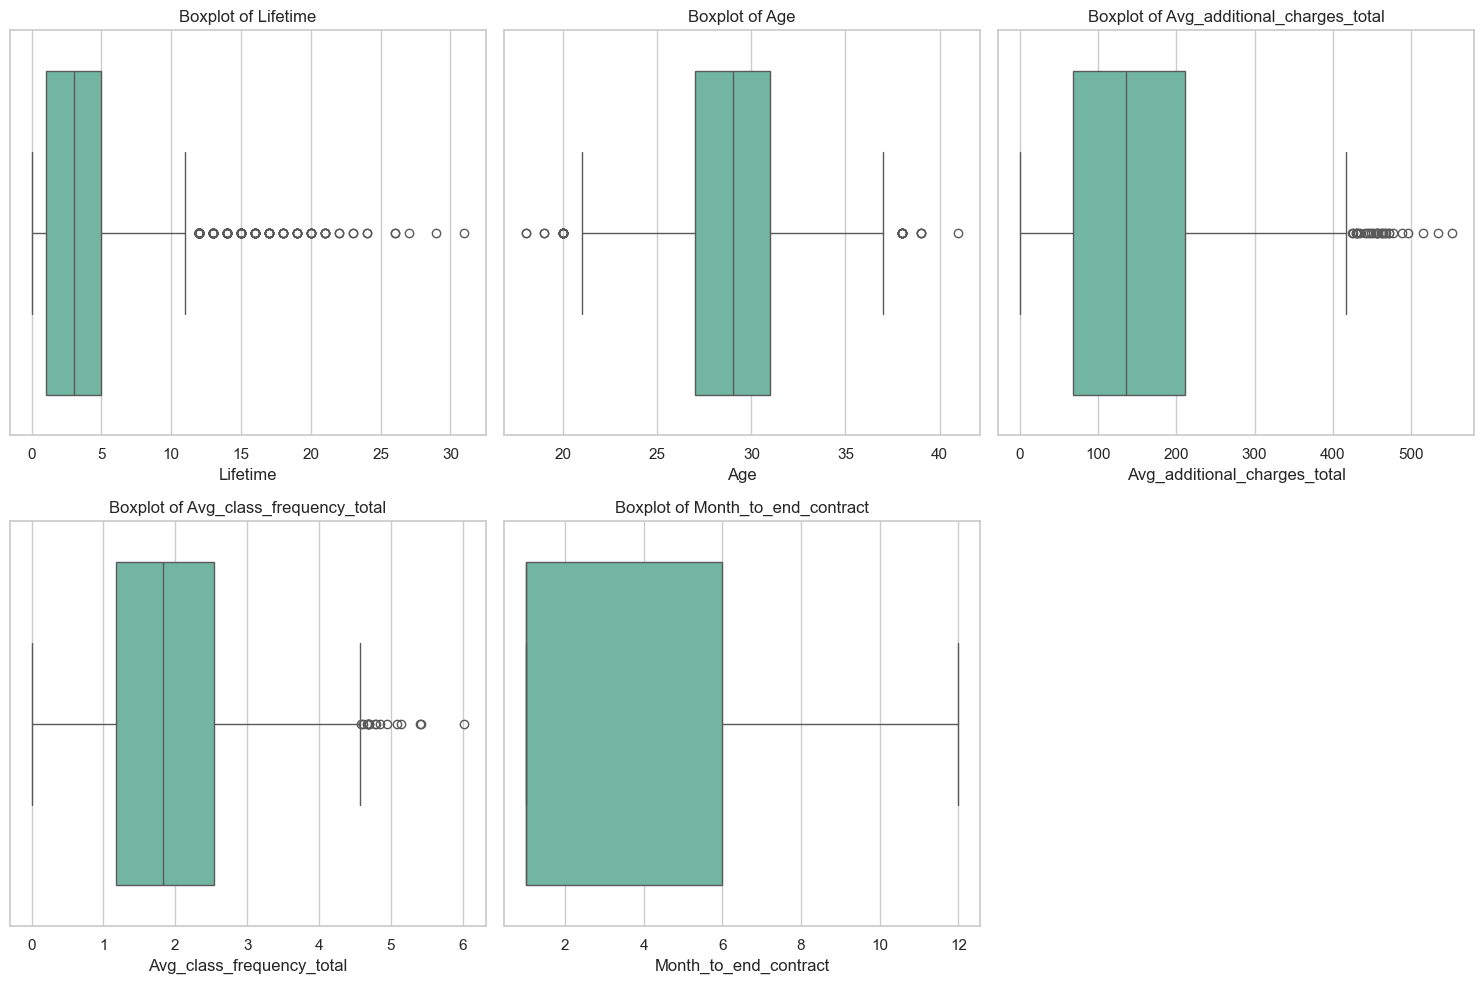

In [36]:
numerical_features = ['Lifetime', 'Age', 'Avg_additional_charges_total', 'Avg_class_frequency_total', 'Month_to_end_contract']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], palette="Set2")
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

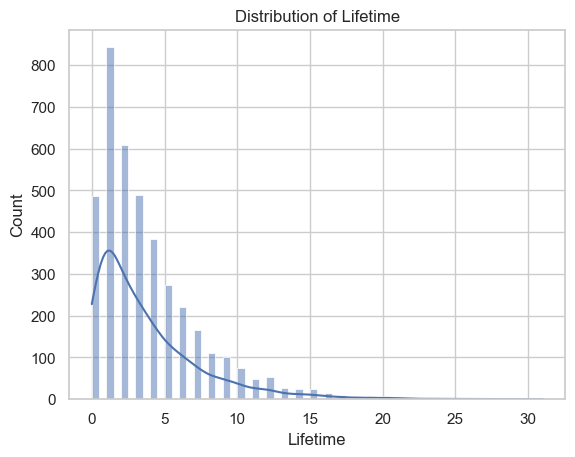

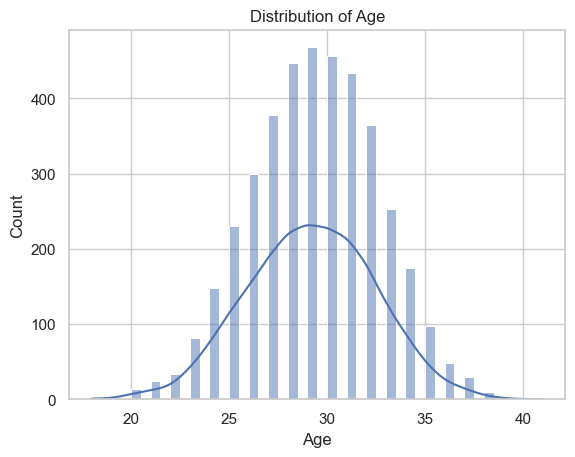

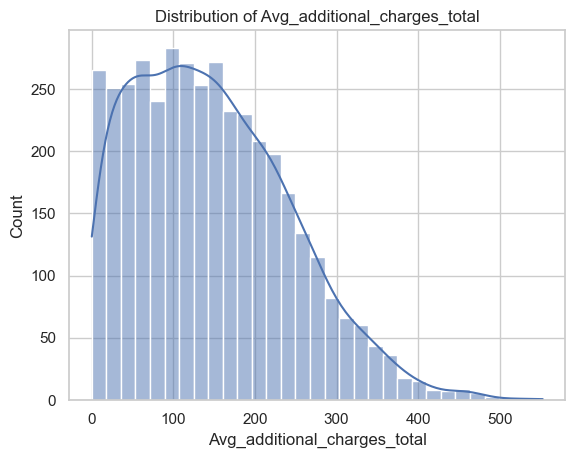

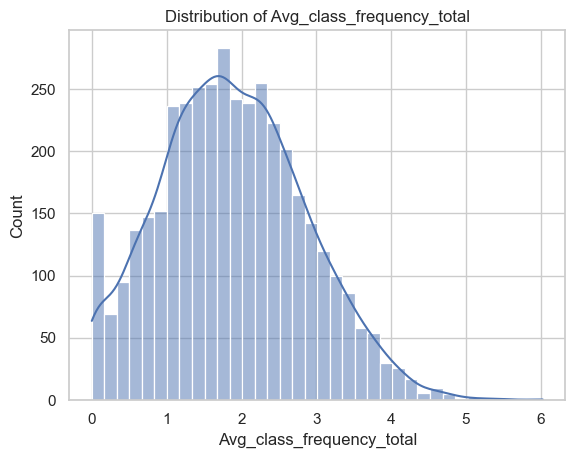

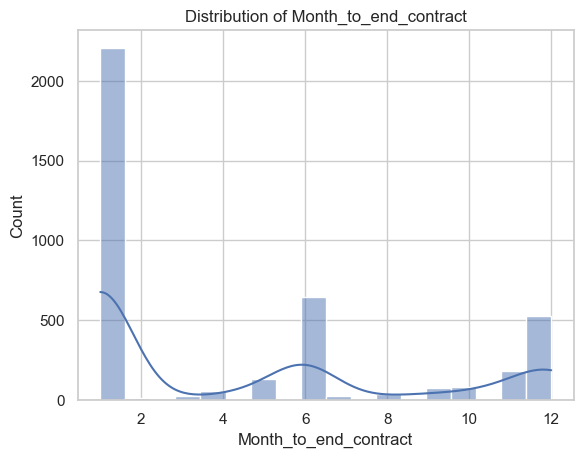

In [37]:
for col in numerical_features:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [38]:
# Calculate IQR for each numerical column
Q1 = df_new[numerical_features].quantile(0.25)
Q3 = df_new[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_new[numerical_features] < (Q1 - 1.5 * IQR)) | 
            (df_new[numerical_features] > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Count of outliers per feature

Lifetime                        192
Age                              32
Avg_additional_charges_total     29
Avg_class_frequency_total        16
Month_to_end_contract             0
dtype: int64


In [39]:
# Step 5: Remove rows with outliers
df_cleaned = df_new[~outliers.any(axis=1)]

print("Original dataset shape:", df_new.shape)
print("Cleaned dataset shape:", df_cleaned.shape)


Original dataset shape: (4000, 14)
Cleaned dataset shape: (3735, 14)


### Check for multicollinearity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a DataFrame for VIF calculation
X_vif = df[numerical_features]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display VIF values
print(vif_data)

                        Feature       VIF
0                      Lifetime  2.096803
1                           Age  7.892466
2  Avg_additional_charges_total  3.367531
3     Avg_class_frequency_total  4.819814
4         Month_to_end_contract  2.170513


Despite, detected moderate multicollinearity of age (VIF > 5) we will retain Age since we plan to use tree-based models like Random Forest or XGBoost which are less sensitive to multicollinearity.

### 3.4 Feature Engineering

In [41]:
# Based on weak correlations, we drop the the columns Phone and Gender 
df_cleaned.drop(columns=['Phone', 'gender'], inplace=True)

In [42]:
df_cleaned.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,1,0,0,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,1,1,0,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


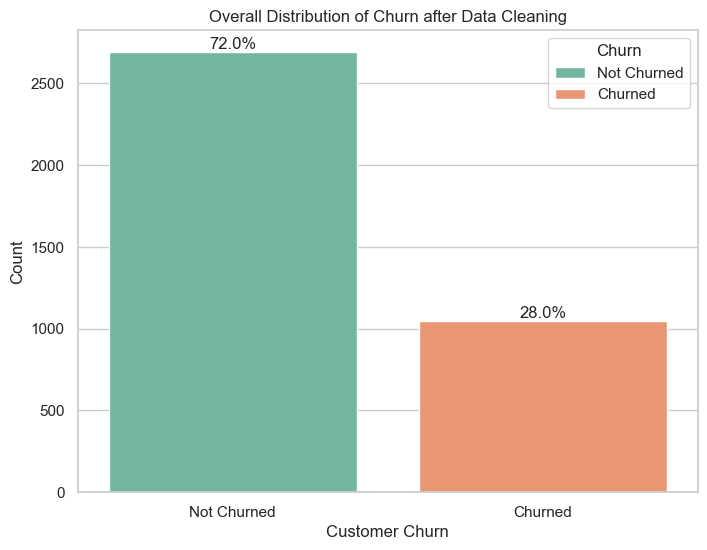

In [50]:
# Plot distribution of Churn with percentages after removing outliers
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x="Churn", palette="Set2")

# Calculate the percentage of churned and not churned customers
churn_counts = df_cleaned['Churn'].value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100

# Adding percentage annotations above the bars
for i, count in enumerate(churn_counts):
    percentage = churn_percentages[i]
    plt.text(x=i,  # Position on the x-axis
             y=count + 5,  # Position slightly above the bar
             s=f'{percentage:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=12)

# Set labels and title
plt.title("Overall Distribution of Churn after Data Cleaning")
plt.xlabel("Customer Churn")
plt.ylabel("Count")

# Adding legend
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

plt.xticks(ticks=[0, 1], labels=["Not Churned", "Churned"])
plt.show()


### Modeling without Data Balancing

In [43]:
X = df_cleaned.drop(['Churn'], axis=1)
y = df_cleaned['Churn']

Training Logistic Regression...
Logistic Regression - Cross-Validation Accuracy: 0.92


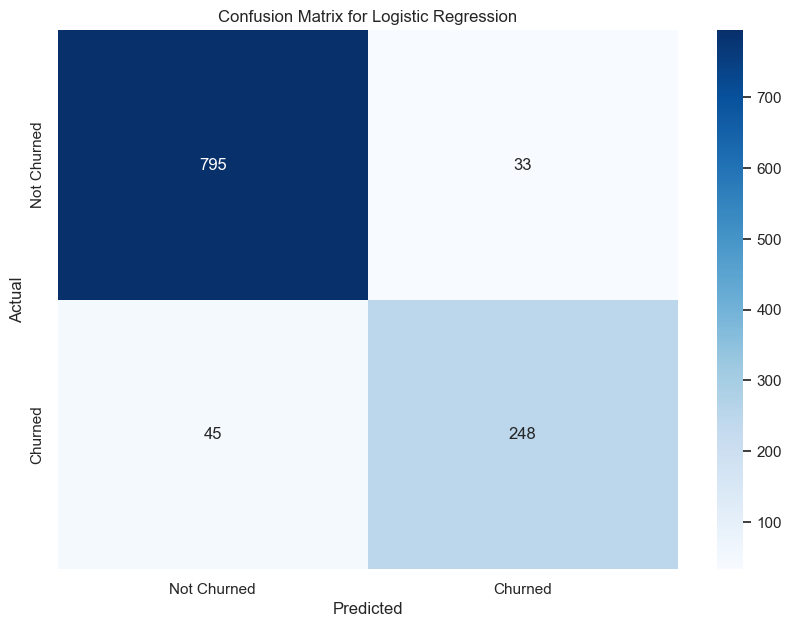

Training Decision Tree...
Decision Tree - Cross-Validation Accuracy: 0.88


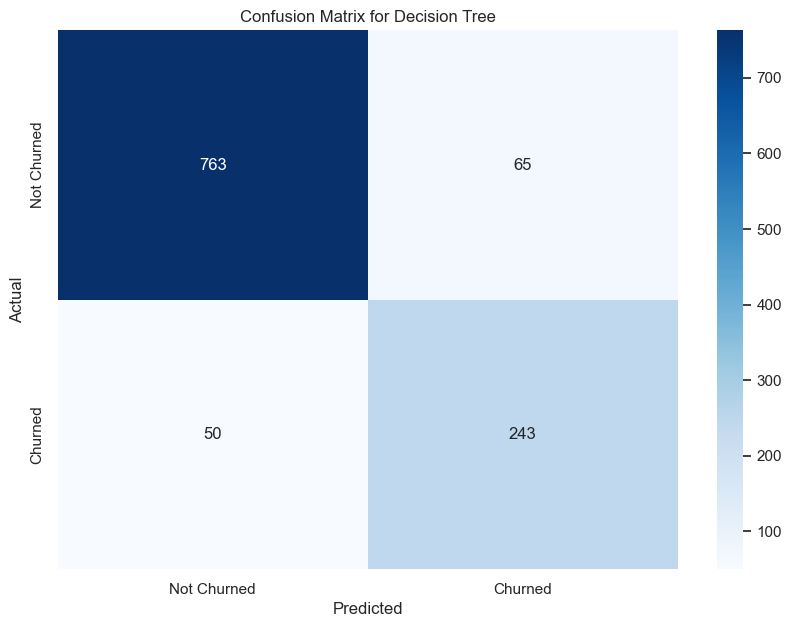

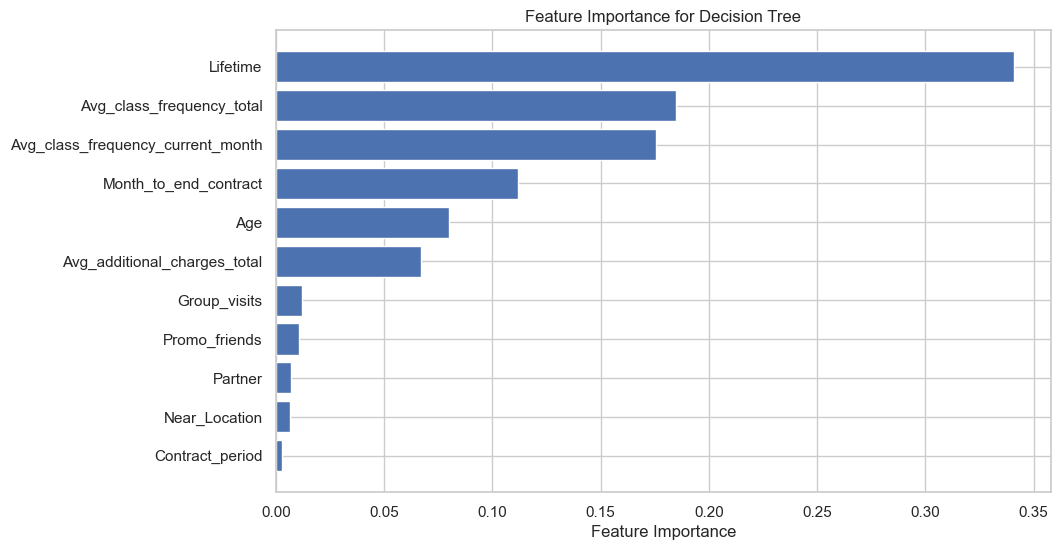

Training Random Forest...
Random Forest - Cross-Validation Accuracy: 0.92


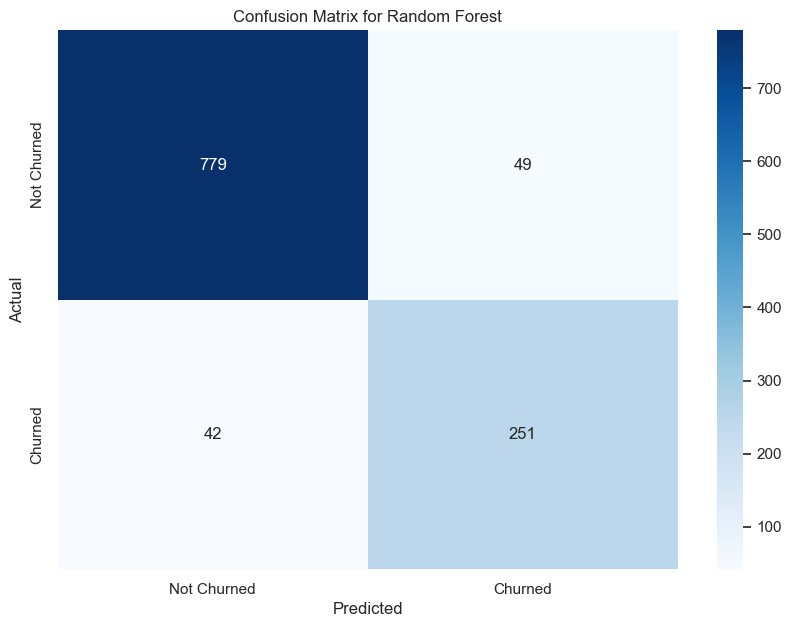

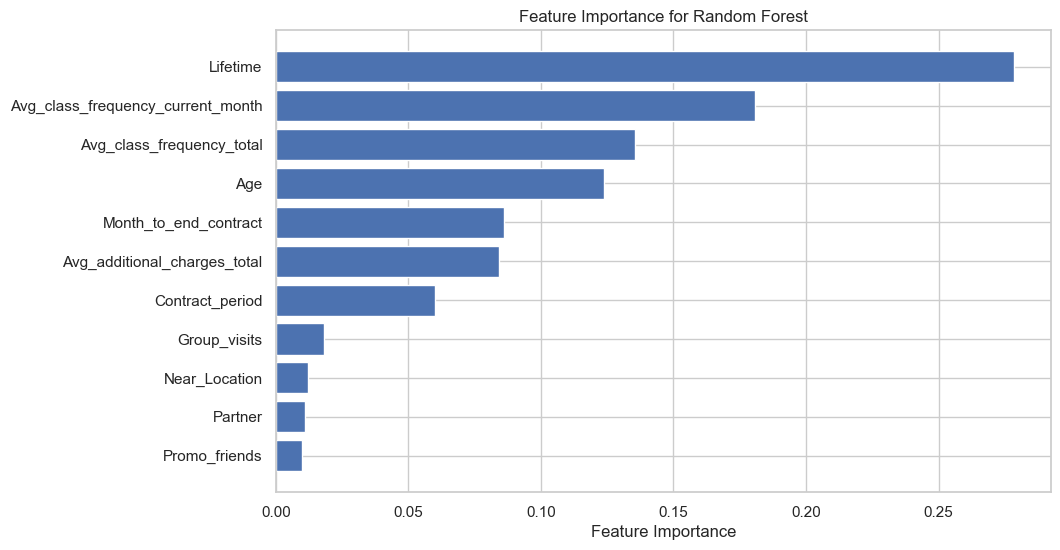

Training SVM...
SVM - Cross-Validation Accuracy: 0.81


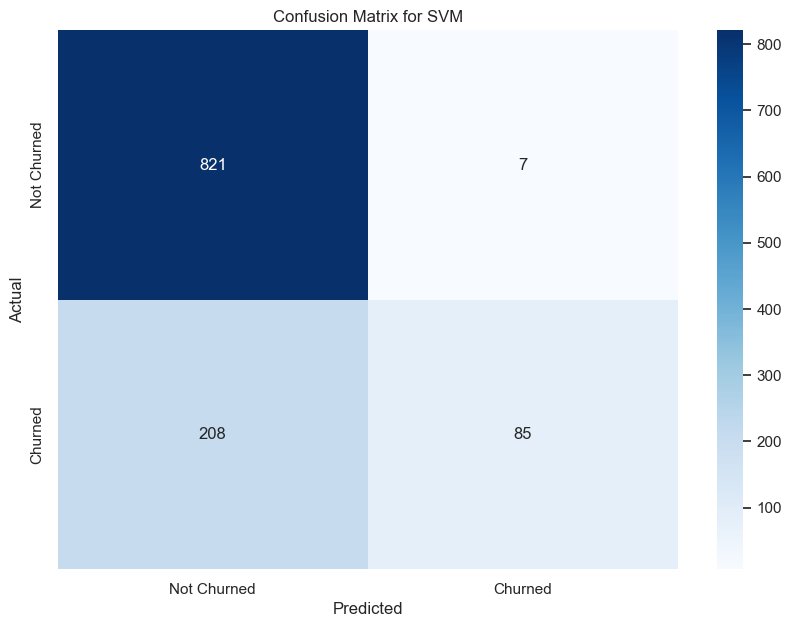

Training XGBoost...
XGBoost - Cross-Validation Accuracy: 0.94


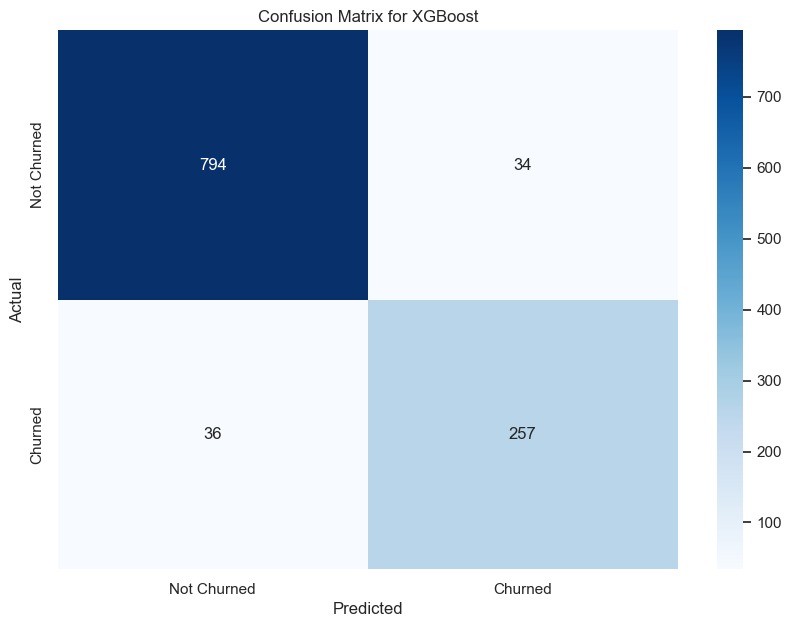

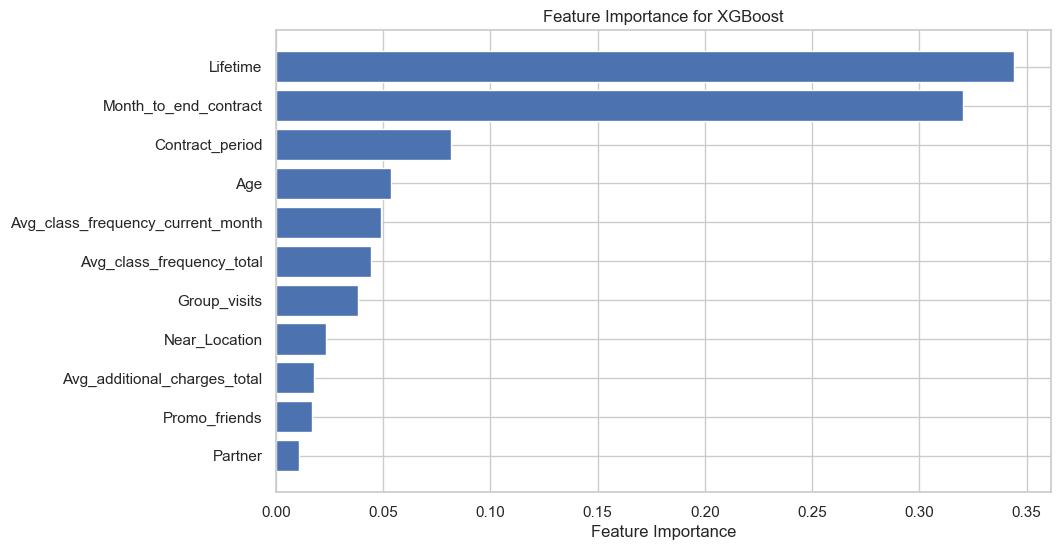

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd

# Split the dataset without balancing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()
}

# Store classification reports and cross-validation scores
classification_reports = {}
cross_val_results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    cross_val_results[name] = cv_scores
    print(f"{name} - Cross-Validation Accuracy: {cv_scores.mean():.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        sorted_idx = feature_importance.argsort()
        plt.figure(figsize=(10, 6))
        plt.barh([X.columns[i] for i in sorted_idx], feature_importance[sorted_idx])
        plt.xlabel("Feature Importance")
        plt.title(f"Feature Importance for {name}")
        plt.show()

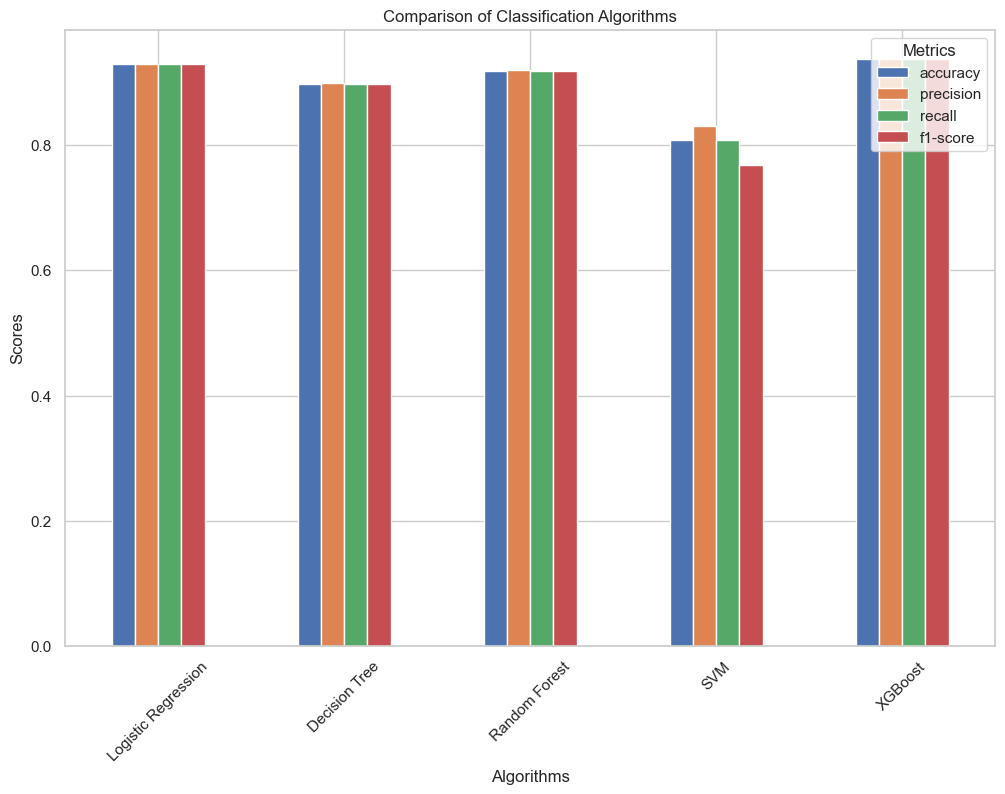

In [47]:
# Create comparison plot for classification metrics
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
model_names = list(classification_reports.keys())
comparison_df = pd.DataFrame(columns=metrics, index=model_names)

for model_name, report in classification_reports.items():
    comparison_df.loc[model_name] = [
        report['accuracy'],
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    ]

comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

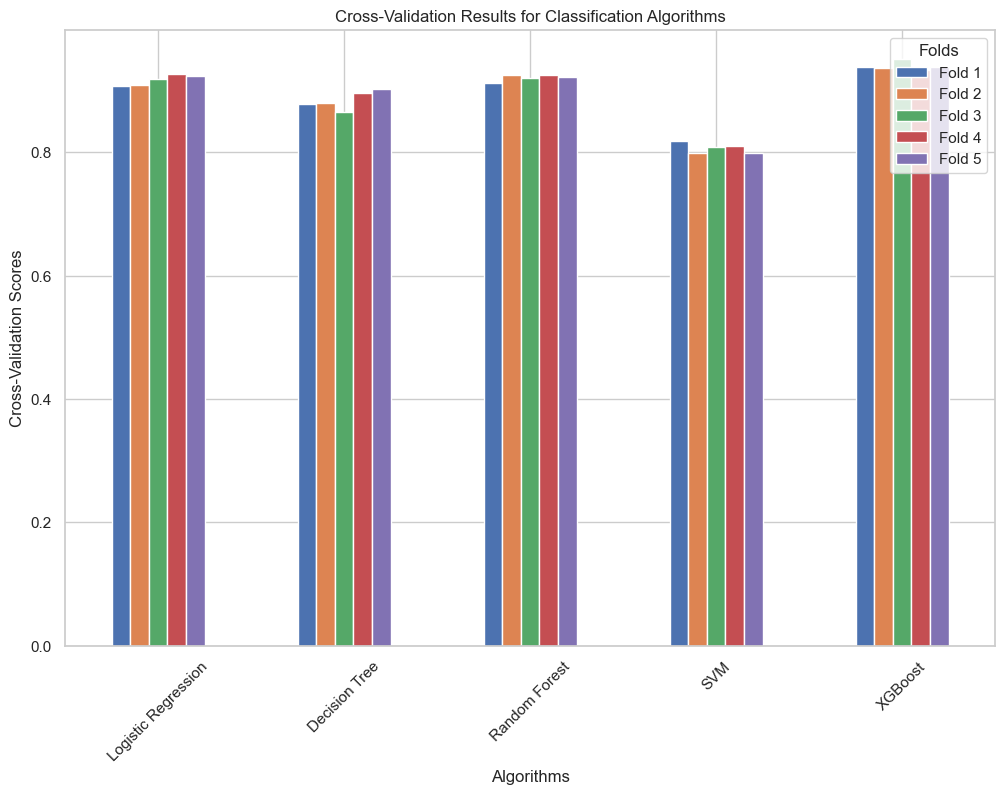

In [48]:
# Create comparison plot for cross-validation results
cv_df = pd.DataFrame(cross_val_results).T
cv_df.columns = [f'Fold {i+1}' for i in range(cv_df.shape[1])]
cv_df.plot(kind='bar', figsize=(12, 8))
plt.title('Cross-Validation Results for Classification Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Cross-Validation Scores')
plt.xticks(rotation=45)
plt.legend(title='Folds')
plt.show()


### 3.5 Data Balancing

### Class Imbalance and Dataset Size Considerations

While this is not an extreme imbalance, it is significant enough to potentially bias machine learning models toward predicting the majority class (**Not Churned**). The dataset contains 3,735 rows, which is relatively small for machine learning tasks.

Undersampling reduces the size of the majority class (**Not Churned**), potentially leading to a significant loss of valuable information and making the dataset even smaller. Undersampling would remove many majority class samples to match the minority class size, which could result in insufficient data for training robust models. This can lead to overfitting on the minority class and poor performance when predicting the majority class.

Instead, we are using an **oversampling** technique to balance the dataset while preserving all available data.


**Random Oversampling** duplicates samples from the minority class to match the majority class size.It is easy to implement but may lead to overfitting.

In [51]:
from imblearn.over_sampling import RandomOverSampler

# Define RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling
X_resampled, y_resampled =ros.fit_resample(X, y)

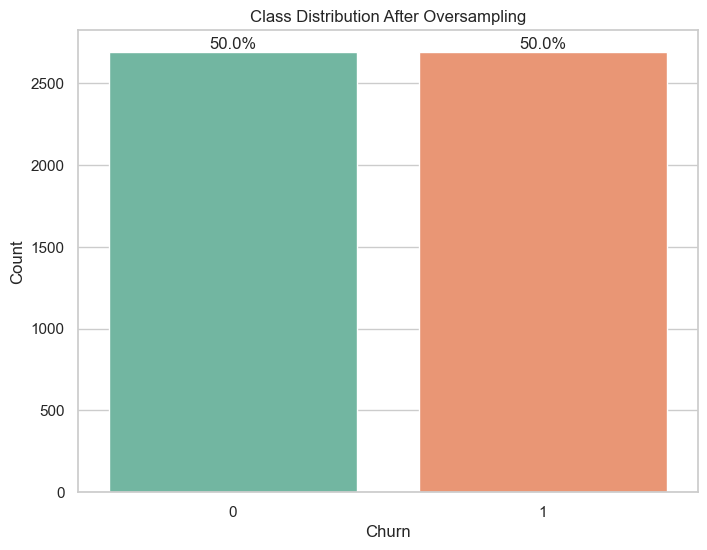

In [52]:
# Plot the new class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette="Set2")

# Calculate the count and percentage of each class
churn_counts = y_resampled.value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100

# Adding percentage annotations above the bars
for i, count in enumerate(churn_counts):
    percentage = churn_percentages[i]
    plt.text(x=i,  # Position on the x-axis
             y=count + 5,  # Position slightly above the bar
             s=f'{percentage:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=12)

# Set labels and title
plt.title("Class Distribution After Oversampling")
plt.xlabel("Churn")
plt.ylabel("Count")

# Display the plot
plt.show()


### 3.6 Split the Oversampled Dataset

In [53]:
# Split data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (4304, 11)
Test set size: (1076, 11)


### 4. Modeling

In [54]:
#classification: logistic regression, decision tree, random forest,
#(convolutional) neural networks

### 4.1 Modeling with RandomOversampling


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       807
           1       0.91      0.91      0.91       807

    accuracy                           0.91      1614
   macro avg       0.91      0.91      0.91      1614
weighted avg       0.91      0.91      0.91      1614

Logistic Regression - Cross-Validation Accuracy: 0.96


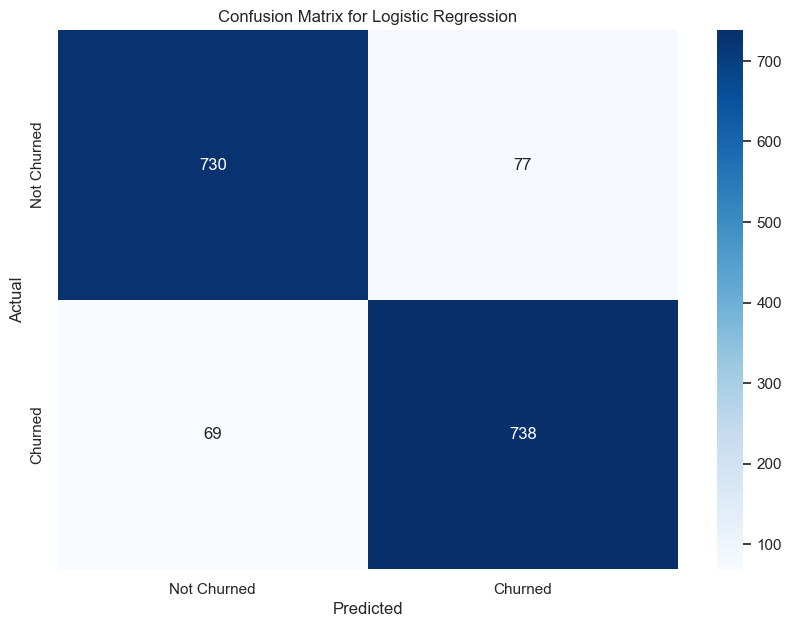


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       807
           1       0.89      0.90      0.90       807

    accuracy                           0.90      1614
   macro avg       0.90      0.90      0.90      1614
weighted avg       0.90      0.90      0.90      1614

Decision Tree - Cross-Validation Accuracy: 0.96


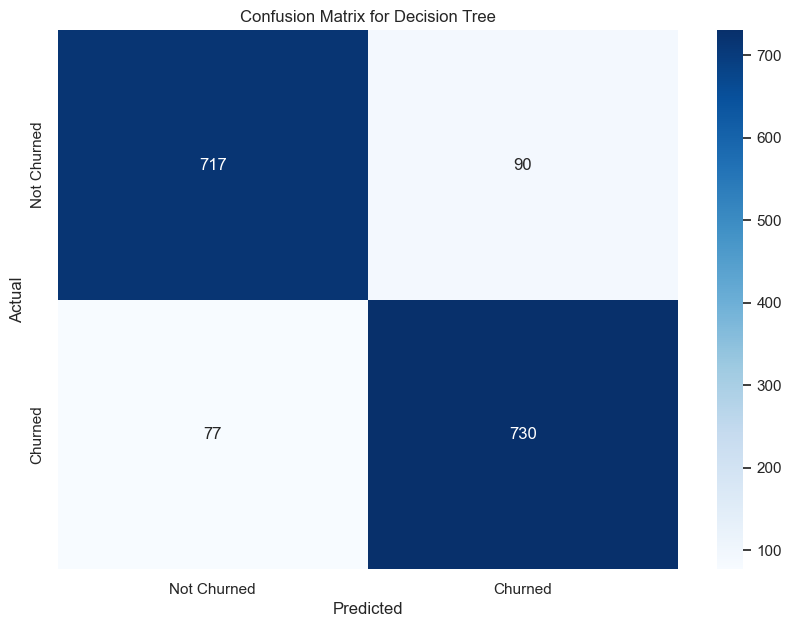

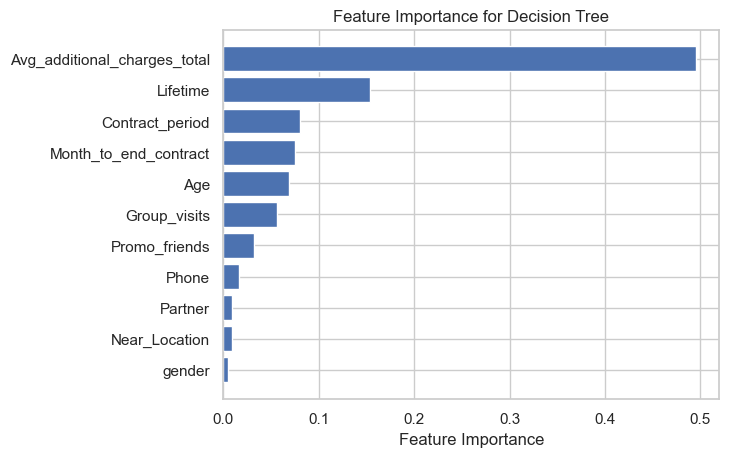


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       807
           1       0.94      0.94      0.94       807

    accuracy                           0.94      1614
   macro avg       0.94      0.94      0.94      1614
weighted avg       0.94      0.94      0.94      1614

Random Forest - Cross-Validation Accuracy: 0.96


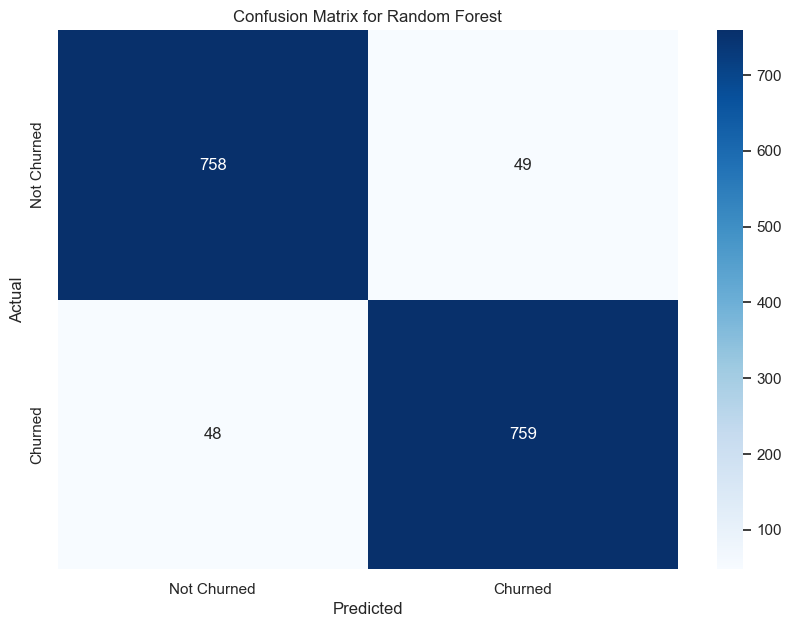

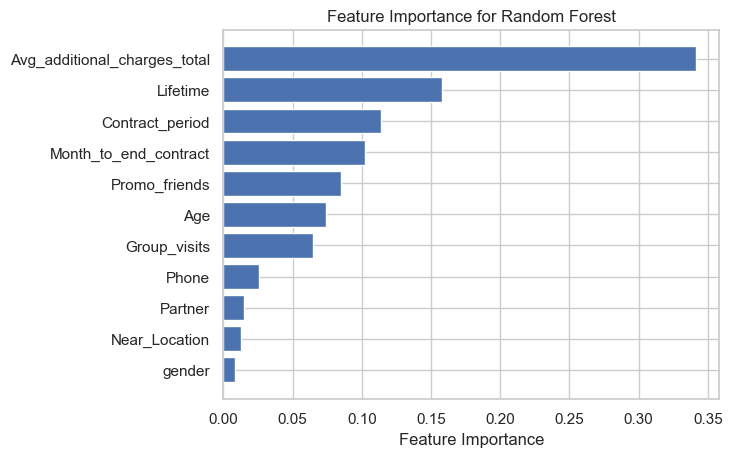


Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       807
           1       0.81      0.94      0.87       807

    accuracy                           0.86      1614
   macro avg       0.87      0.86      0.86      1614
weighted avg       0.87      0.86      0.86      1614

SVM - Cross-Validation Accuracy: 0.96


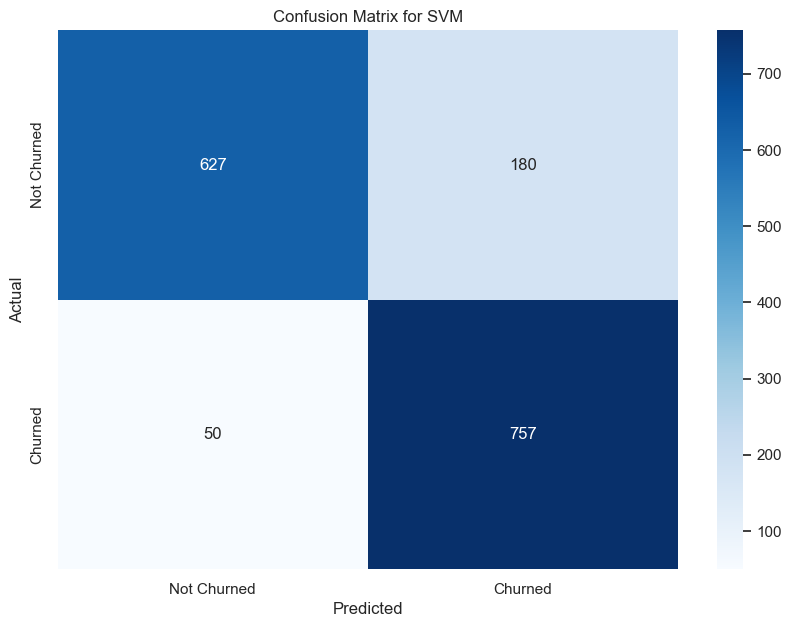


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       807
           1       0.95      0.95      0.95       807

    accuracy                           0.95      1614
   macro avg       0.95      0.95      0.95      1614
weighted avg       0.95      0.95      0.95      1614

XGBoost - Cross-Validation Accuracy: 0.96


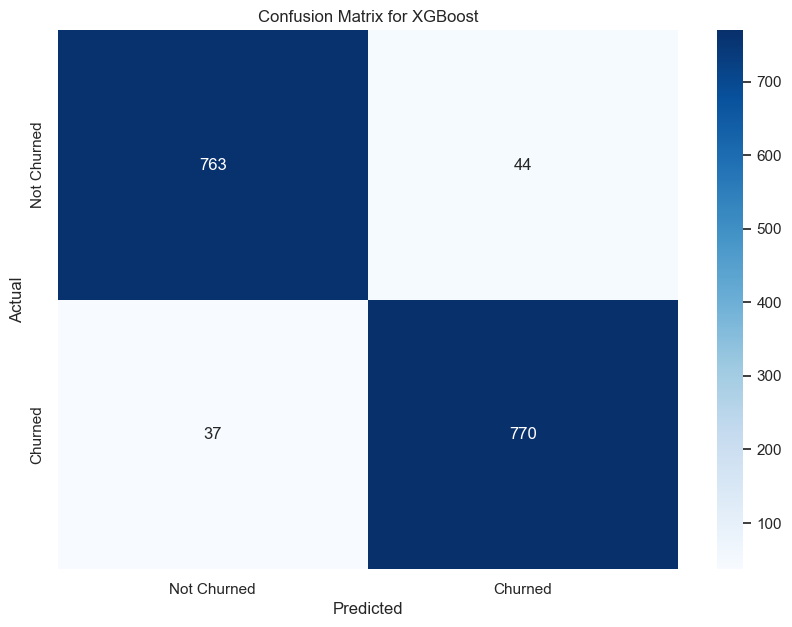

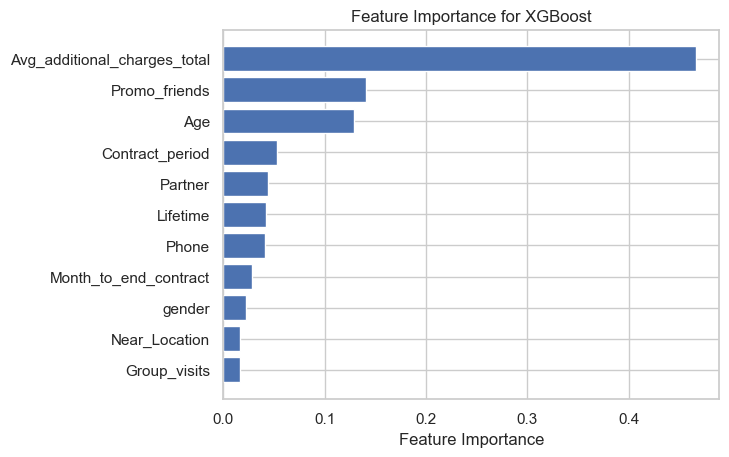

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import pandas as pd

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()
}

# Store classification reports
classification_reports = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report

    # Print report
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, y_pred))

    # Cross-validation
    cv_scores_ros = cross_val_score(model, X_resampled, y_resampled, cv=5)
    cross_val_results[name] = cv_scores_ros
    print(f"{name} - Cross-Validation Accuracy: {cv_scores.mean():.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        sorted_idx = feature_importance.argsort()
        plt.barh(df.columns[sorted_idx], feature_importance[sorted_idx])
        plt.xlabel("Feature Importance")
        plt.title(f"Feature Importance for {name}")
        plt.show()


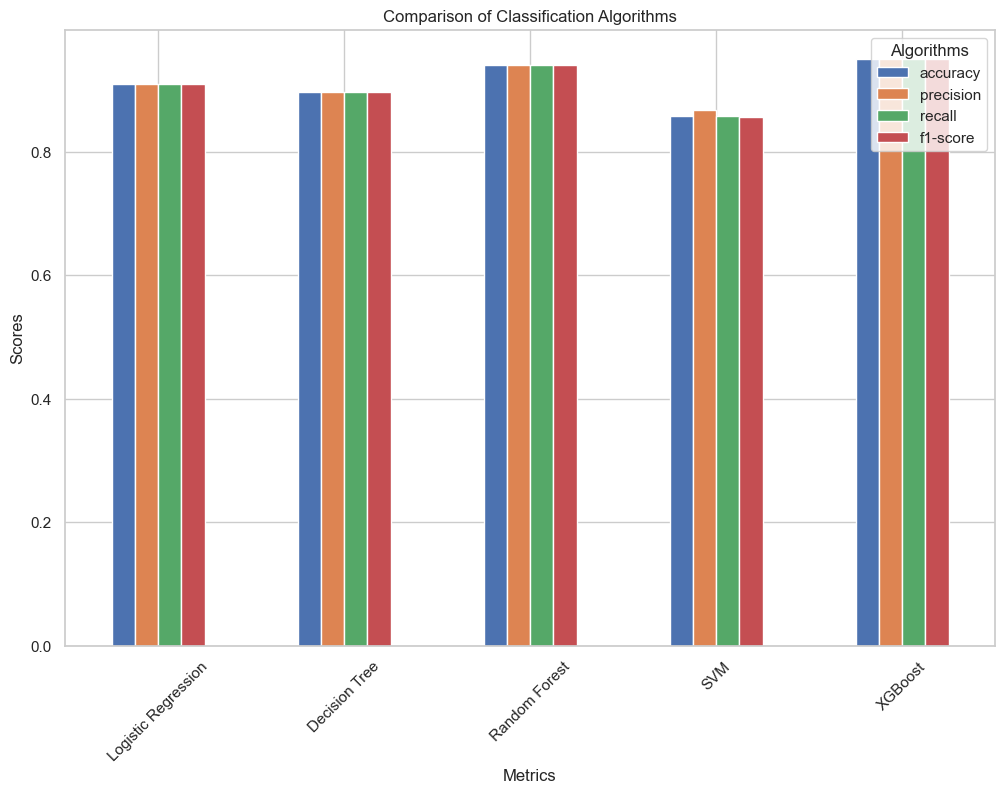

In [72]:
# Create comparison plot
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
model_names = list(classification_reports.keys())
comparison_df = pd.DataFrame(columns=metrics, index=model_names)

for model_name, report in classification_reports.items():
    comparison_df.loc[model_name] = [
        report['accuracy'],
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    ]

comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Algorithms (ROS)')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Algorithms')
plt.show()

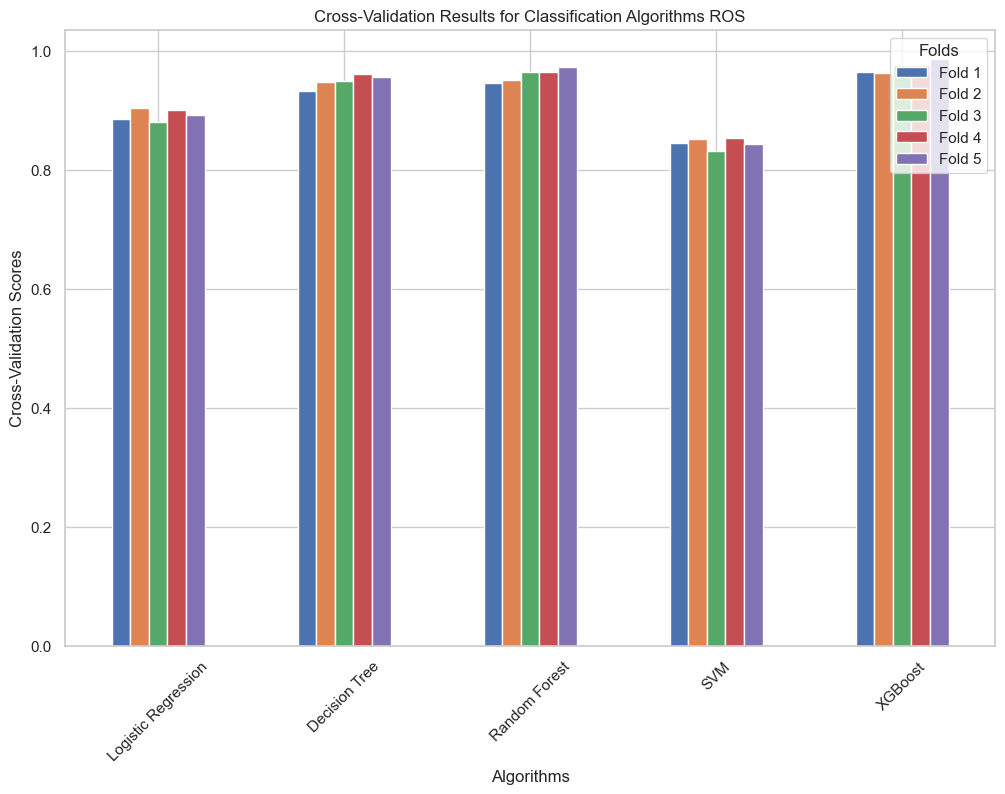

In [73]:
# Create comparison plot for cross-validation results
cv_df_ros = pd.DataFrame(cross_val_results).T
cv_df_ros.columns = [f'Fold {i+1}' for i in range(cv_df.shape[1])]
cv_df_ros.plot(kind='bar', figsize=(12, 8))
plt.title('Cross-Validation Results for Classification Algorithms (ROS)')
plt.xlabel('Algorithms')
plt.ylabel('Cross-Validation Scores')
plt.xticks(rotation=45)
plt.legend(title='Folds')
plt.show()

### 4.2 Modeling with SMOTE Oversampling

**SMOTE** (Synthetic Minority Oversampling Technique) generates synthetic samples for the minority class using k-nearest neighbors.It reduces overfitting compared to random oversampling.

In [57]:
from imblearn.over_sampling import SMOTE
# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

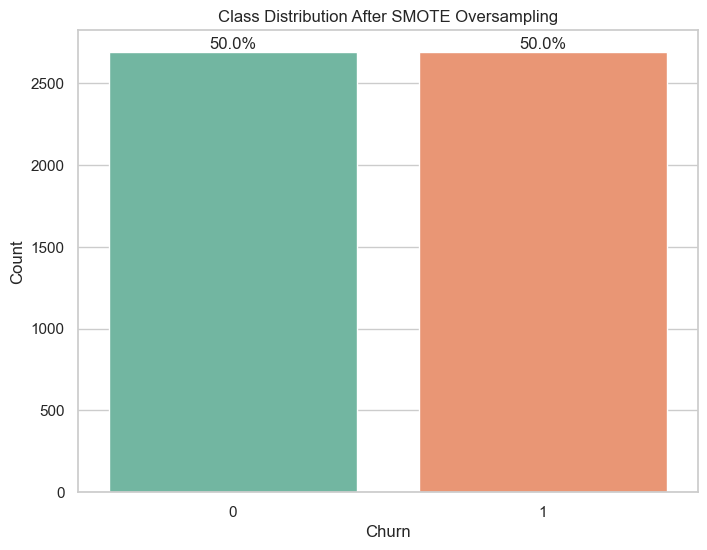

In [58]:
# Plot the new class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote, palette="Set2")

# Calculate the count and percentage of each class
churn_counts = y_smote.value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100

# Adding percentage annotations above the bars
for i, count in enumerate(churn_counts):
    percentage = churn_percentages[i]
    plt.text(x=i,  # Position on the x-axis
             y=count + 5,  # Position slightly above the bar
             s=f'{percentage:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=12)

# Set labels and title
plt.title("Class Distribution After SMOTE Oversampling")
plt.xlabel("Churn")
plt.ylabel("Count")

# Display the plot
plt.show()

Logistic Regression - Cross-Validation Accuracy: 0.92


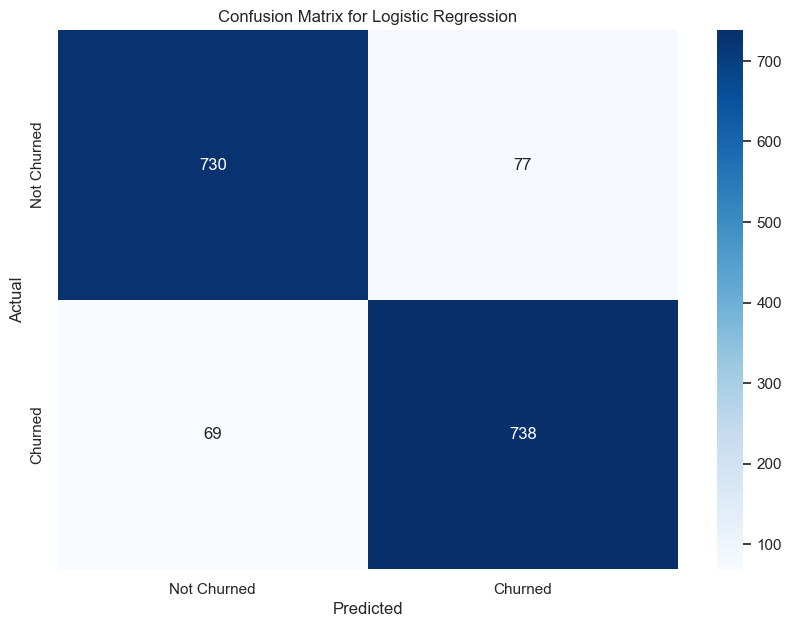

Decision Tree - Cross-Validation Accuracy: 0.91


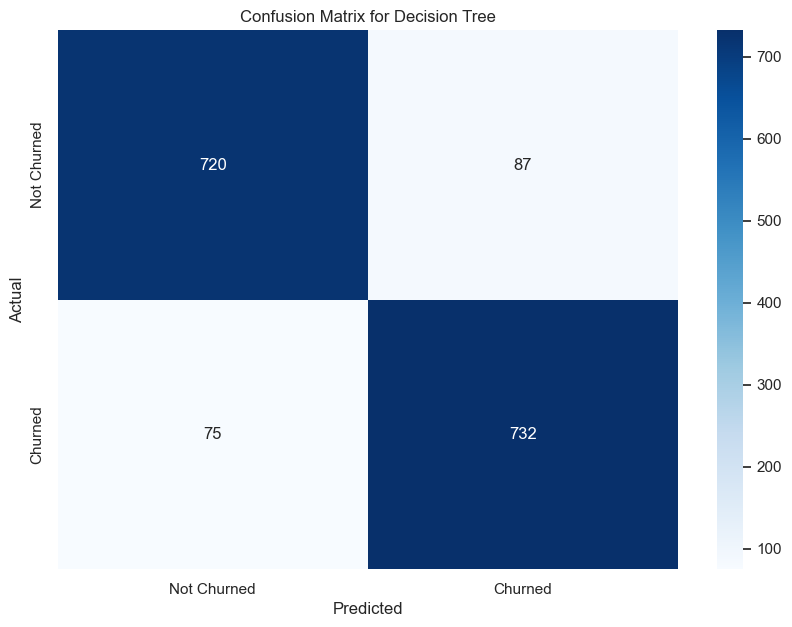

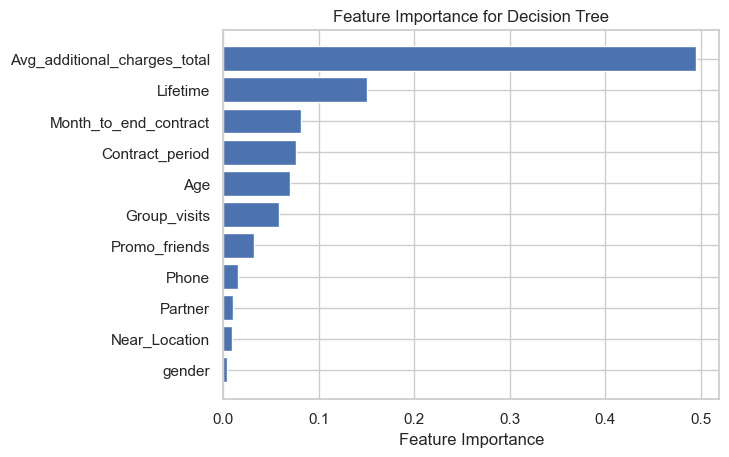

Random Forest - Cross-Validation Accuracy: 0.94


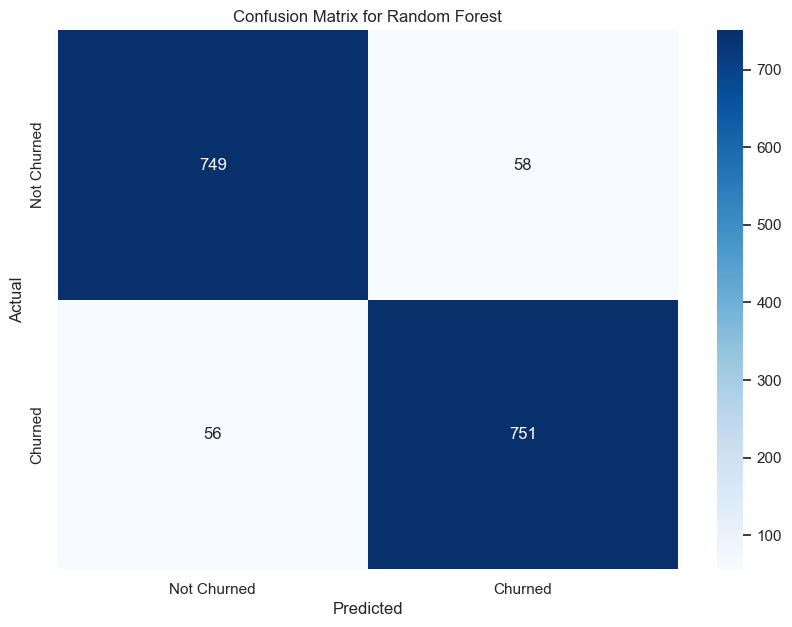

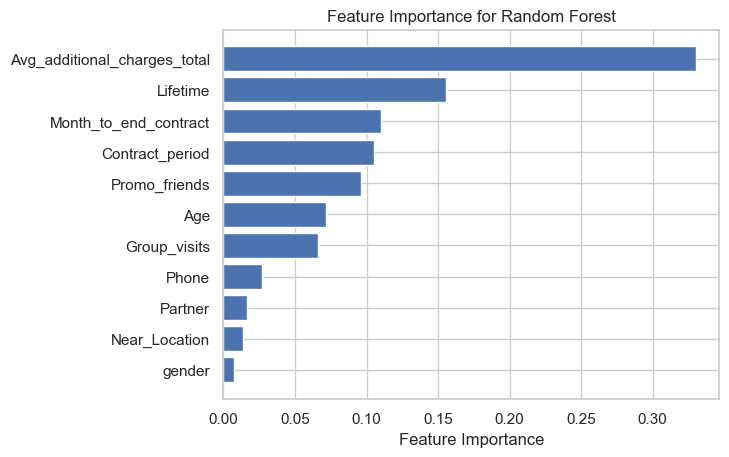

SVM - Cross-Validation Accuracy: 0.86


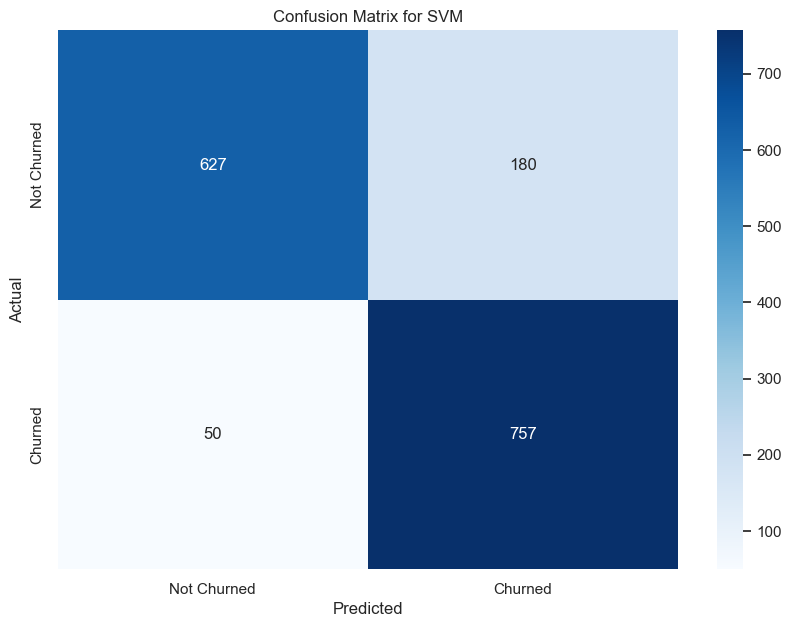

XGBoost - Cross-Validation Accuracy: 0.96


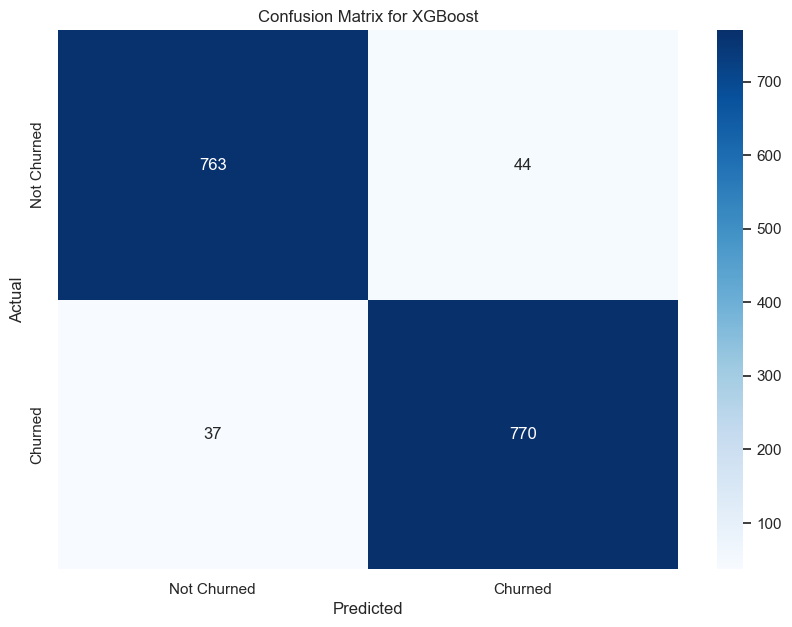

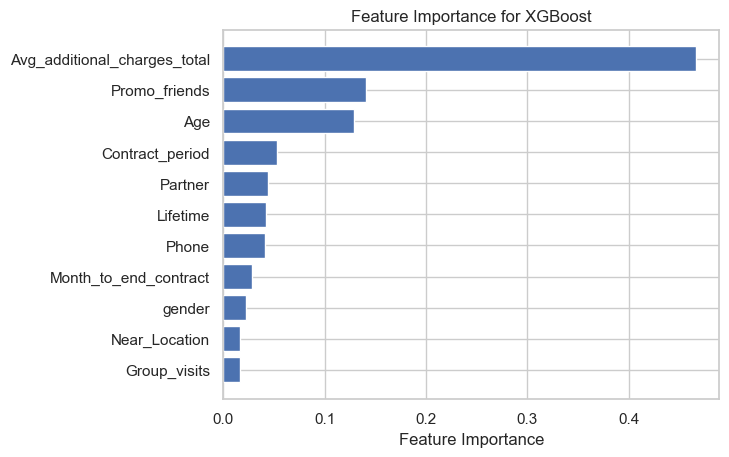

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd

# Assuming X_smote and y_smote are defined
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()
}

# Store classification reports and cross-validation scores
classification_reports = {}
cross_val_results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_test_smote)

    # Classification report
    report = classification_report(y_test_smote, y_pred_smote, output_dict=True)
    classification_reports[name] = report

    # Cross-validation
    cv_scores = cross_val_score(model, X_smote, y_smote, cv=5)
    cross_val_results[name] = cv_scores
    print(f"{name} - Cross-Validation Accuracy: {cv_scores.mean():.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_test_smote, y_pred_smote)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        sorted_idx = feature_importance.argsort()
        plt.barh(df.columns[sorted_idx], feature_importance[sorted_idx])
        plt.xlabel("Feature Importance")
        plt.title(f"Feature Importance for {name}")
        plt.show()

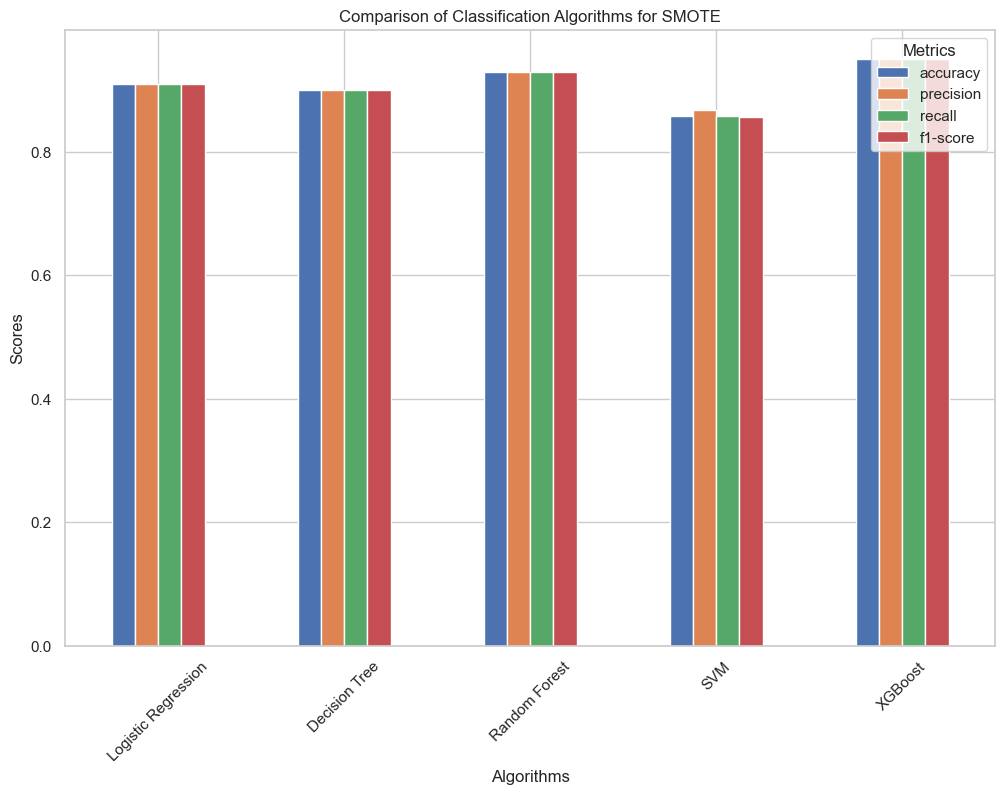

In [70]:
# Create comparison plot for classification metrics
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
model_names = list(classification_reports.keys())
comparison_df = pd.DataFrame(columns=metrics, index=model_names)

for model_name, report in classification_reports.items():
    comparison_df.loc[model_name] = [
        report['accuracy'],
        report['weighted avg']['precision'],
        report['weighted avg']['recall'],
        report['weighted avg']['f1-score']
    ]

comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Algorithms (SMOTE)')
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

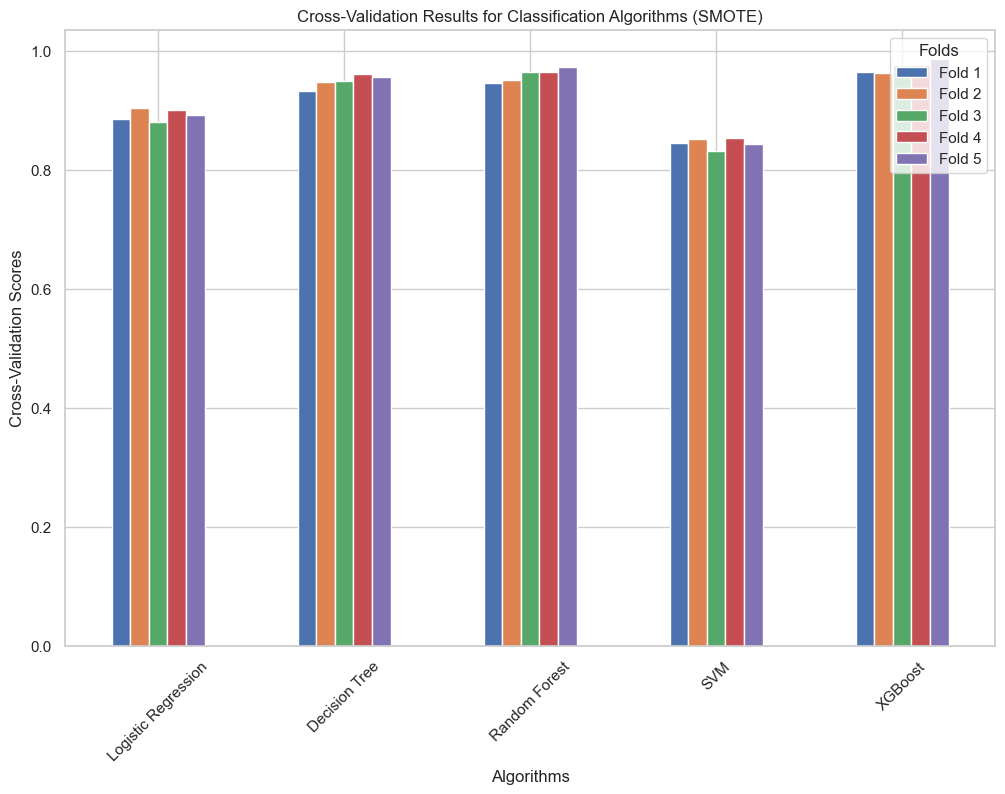

In [79]:
# Create comparison plot for cross-validation results
cv_df = pd.DataFrame(cross_val_results).T
cv_df.columns = [f'Fold {i+1}' for i in range(cv_df.shape[1])]
cv_df.plot(kind='bar', figsize=(12, 8))
plt.title('Cross-Validation Results for Classification Algorithms (SMOTE)')
plt.xlabel('Algorithms')
plt.ylabel('Cross-Validation Scores')
plt.xticks(rotation=45)
plt.legend(title='Folds')
plt.show()